##### 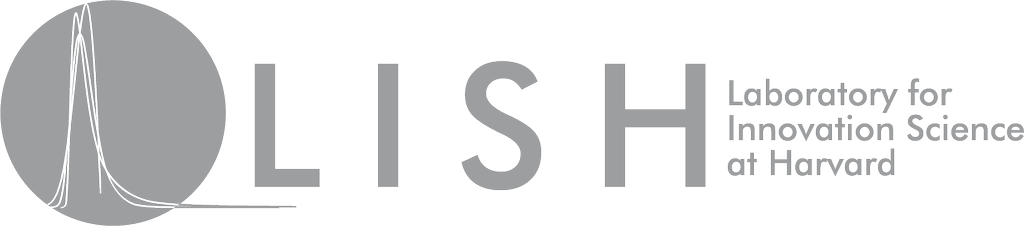

# **Datathon@LISH**

*Krish Mawalkar, Bachelor of Science in Statistics and Machine Learning.*

*Carnegie Mellon University*

*Isabella Lo, Bachelor of Science in Computer and Information Science.*

*The Ohio State University*



### *Confirm Rule Compliance*
**I confirm that I followed all of the stated rules of the competition, including the constraint on AI tools.**

Please type your full name(s) below to indicate your agreement with the above statement.

<u>Participant #1</u>: Krish Mawalkar

<u>Participant #2:</u> Isabella Lo

# Executive Summary

##**Data Challenge Overview -- Richter's Predictor: Modeling Earthquake Damage**

The impact of an earthquake is profound and far-reaching, displacing communities and destroying the infrastructure their lives depend on. A smart understanding of a building’s ability to withstand earthquakes can focus efforts to improve building infrastructure and mitigate the damage caused by future earthquakes. In this competition, you will solve a binary classification focused on predicting the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal, based on aspects of building location and construction.

We will evaluate prediction quality according to a [Log-Loss Error Function](https://www.kaggle.com/dansbecker/what-is-log-loss). (Note that this is different than Percent Accuracy!) As you know, a good statistical model is paramount for helping organizations allocate maintenance resources effectively. We’ve sourced this problem from our friends at [DrivenData](https://www.drivendata.org/), who are some awesome alumni of Harvard Business School and the School of Engineering and Applied Sciences.


##**Introduction**

In this report, we conduct univariate and bivariate exploratory data analysis. We utilize a random forest and XGB models due to its high accuracy, robustness, versatility, and scalability. Other methods we analyzed include a binary logistic model.


Reference

[1] [Understanding Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

## **Data Dictionary**

---



**Target Feature**:
+ `damage_grade`: level of damage to the building that was hit by the earthquake. There are 2 grades of the damage:

  + `0` represents low damage
  + `1` represents moderate to high damage

**Predictors**: <br>
* `geo_level_1_id, geo_level_2_id, geo_level_3_id_group` : geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3).
* `count_floors_pre_eq`: number of floors in the building before the earthquake.
* `age`: age of the building in years
* `area_percentage`: normalized area of the building footprint.
* `height_percentage`: normalized height of the building.
footprint.
* `land_surface_condition`: surface condition of the land where the building was built.
* `foundation_type`: type of foundation used while building.
* `roof_type`: type of roof used while building.
* `ground_floor_type`: type of the ground floor.
* `other_floor_type`: type of constructions used above the ground floor.
* `position`: position of the building
* `plan_configuration`: building plan configuration.
* `has_superstructure_adobe_mud`: flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag`: flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_mud_mortar_brick`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick`: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber`: flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo`: flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered`: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered`: flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other`: flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status`: legal ownership status of the land where the building was built.
* `count_families`: number of families that live in the building.
* `has_secondary_use`: flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture`: flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel`: flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental`: flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution`: flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school`: flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry`: flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post`: flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office`: flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police`: flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other`: flag variable that indicates if the building was secondarily used for other purposes.

# **Your Contest Code**

## **Load Data**

Run the cell below to download and read in the training data.

In [ ]:
# Do not modify this
%autosave 60
import gdown
import pandas as pd

# Download the training data from drive
trainURL = "https://drive.google.com/uc?id=1PT2rvIbVivi--VnpsiCvonZwquWKbPXX"
gdown.download(trainURL, "train.csv", quiet=True)

# Read in the training data to a pandas dataframe called train
train = pd.read_csv("train.csv")
train.head()

Autosaving every 60 seconds


building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       319954              10             151            7723   
1       109339              10            1407            9774   
2       326182              21             581            2565   
3       309380               6            1277            7577   
4       116482               8            1114            8002   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    4    5               19                 12   
1                    3   30                5                  5   
2                    3   10                6                  7   
3                    3   30                7                  7   
4                    2    0                5                  5   

  land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                      t               i  ...                       1   
1                      t               r  ...                       0   
2                      t               r  ...                       0   
3                      t               r  ...                       0   
4                      t               r  ...                       0   

  has_secondary_use_rental has_secondary_use_institution  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

  has_secondary_use_school has_secondary_use_industry  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             0  
1                             0                        0             1  
2                             0                        0             1  
3                             0                        0             1  
4                             0                        0             1  

[5 rows x 40 columns]

## **Load Packages**

You are free to use external packages to aid in your analyses. Note that many data science packages are already installed in the Colab environment. You may also install additional packages if necessary ([instructions](https://www.kindacode.com/snippet/how-to-install-python-libraries-in-google-colab/)).

In [ ]:
# Load packages here;

## **Technical Exposition**

We use this section to develop our predictive models.

### Exploratory Data Analysis (EDA)

---
Used to analyze and investigate data sets and summarize their main charactersitcs, often employing data visualization method. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

---
####Importance

> To look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find intresting relations among the variables

---
####Quantitative Variables
 any variables where the data represent amounts (e.g. height, weight, or age)

####Categorical Variables
any variables where the data represnt groups (e.g. finishing places in a race), classifications (e.g. brands of cereal), and binary outcomes (e.g. coin flips)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208480 entries, 0 to 208479
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             208480 non-null  int64 
 1   geo_level_1_id                          208480 non-null  int64 
 2   geo_level_2_id                          208480 non-null  int64 
 3   geo_level_3_id                          208480 non-null  int64 
 4   count_floors_pre_eq                     208480 non-null  int64 
 5   age                                     208480 non-null  int64 
 6   area_percentage                         208480 non-null  int64 
 7   height_percentage                       208480 non-null  int64 
 8   land_surface_condition                  208480 non-null  object
 9   foundation_type                         208480 non-null  object
 10  roof_type                               208480 non-null 

<ipython-input-2-d5727df6fbfa>:151: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train[train.columns[1:]].corr()['damage_grade'][:].sort_values(ascending=False).to_frame()
<ipython-input-2-d5727df6fbfa>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


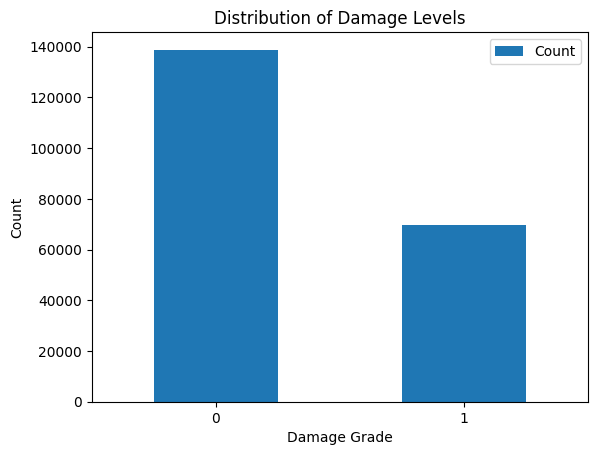

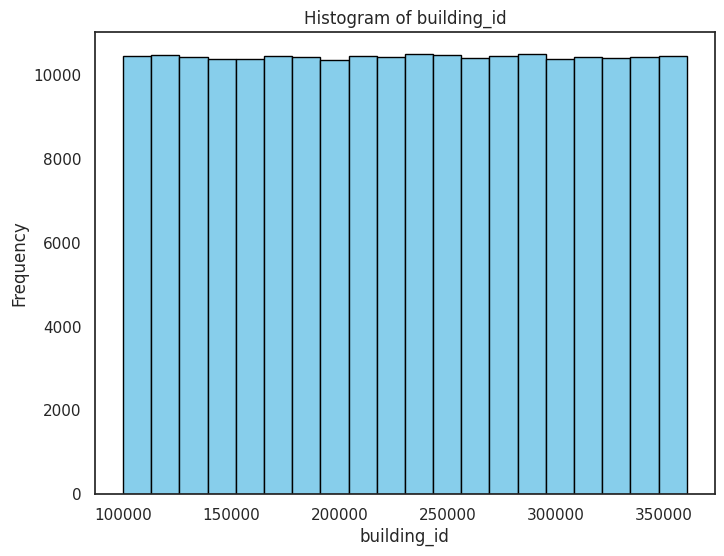

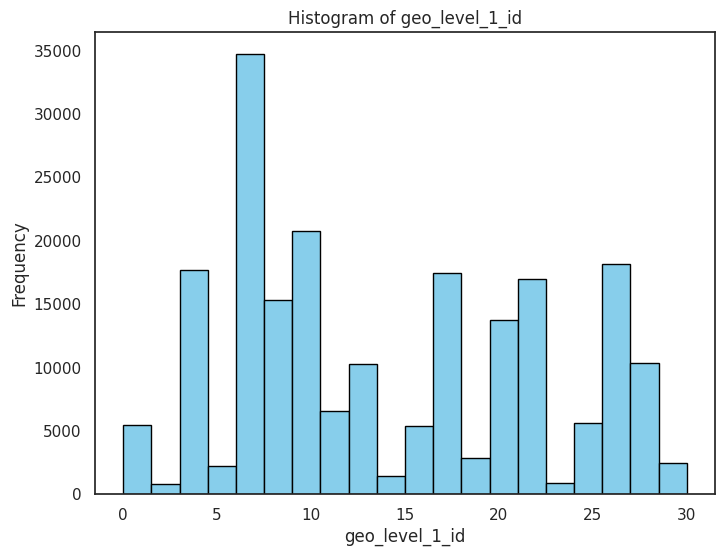

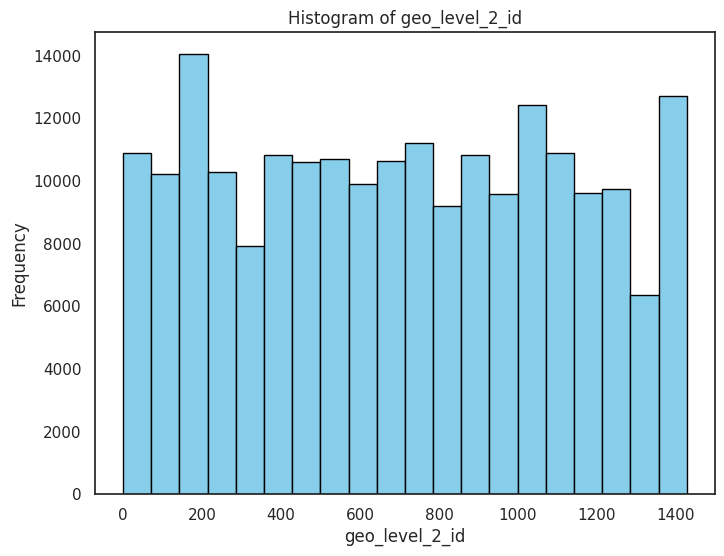

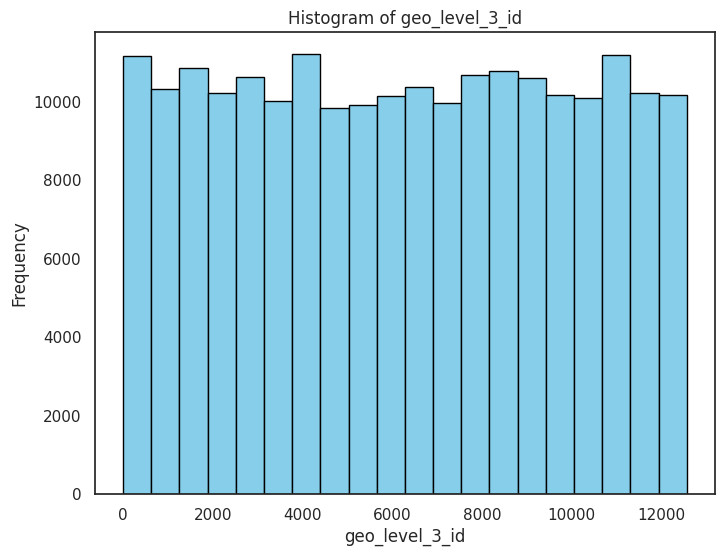

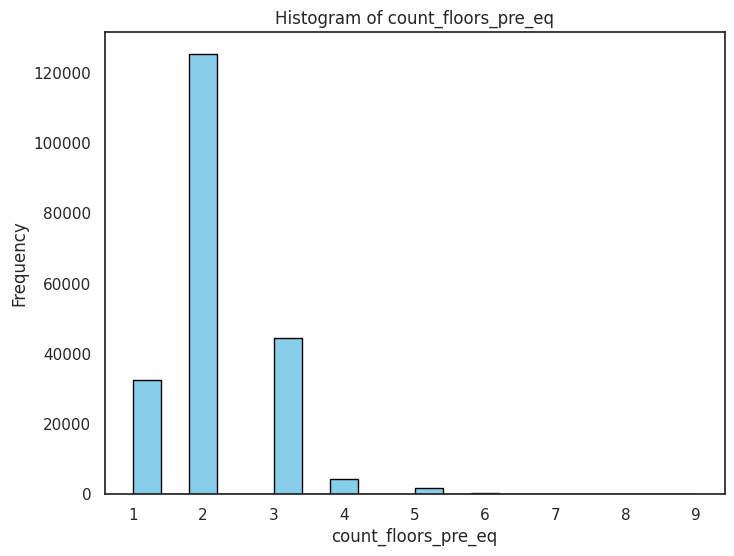

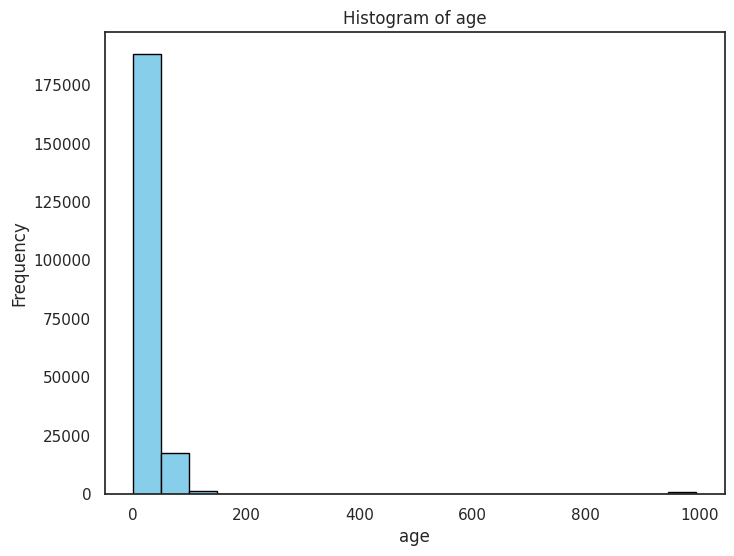

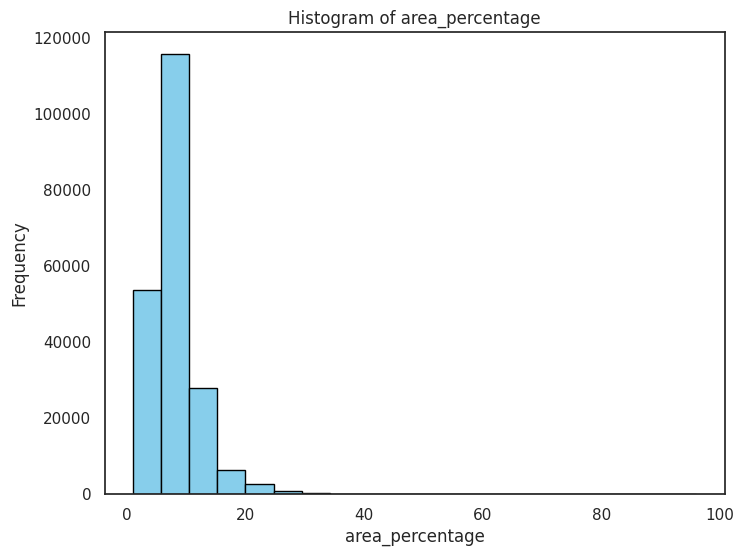

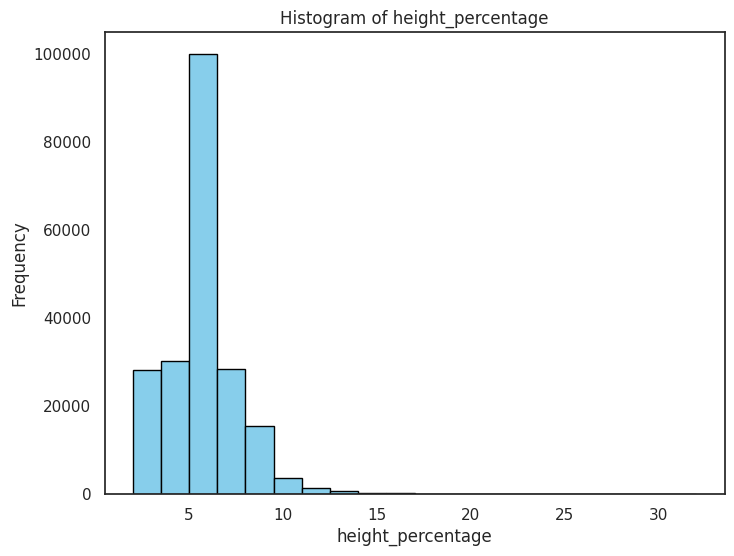

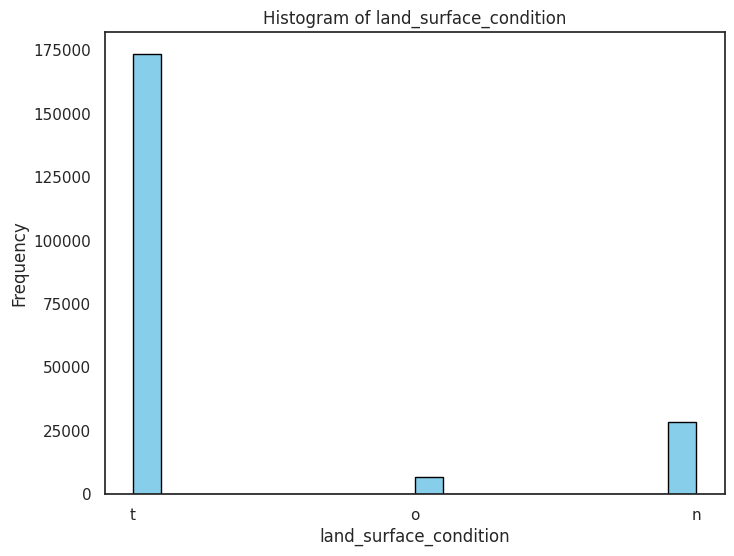

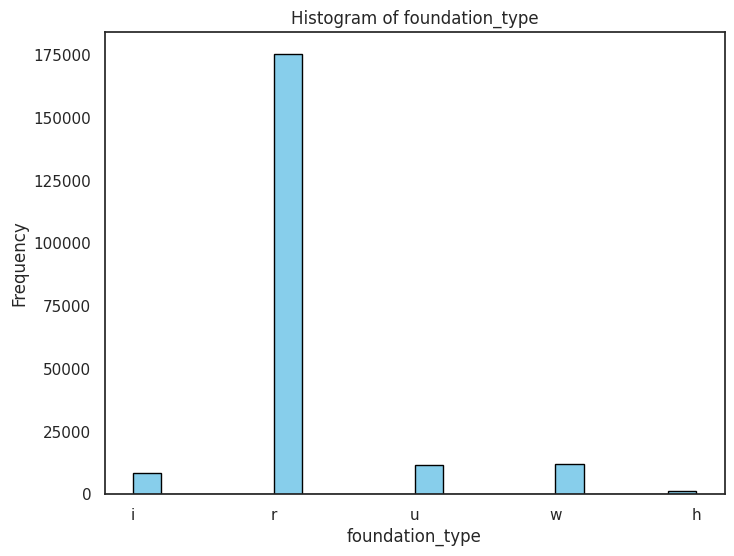

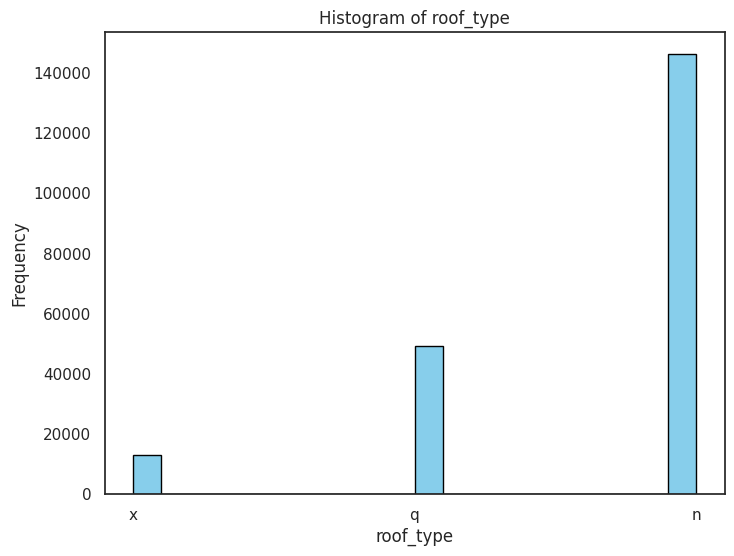

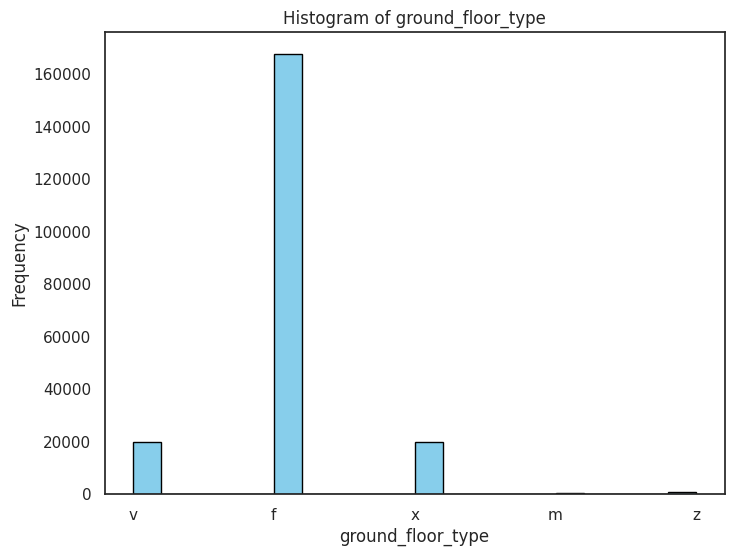

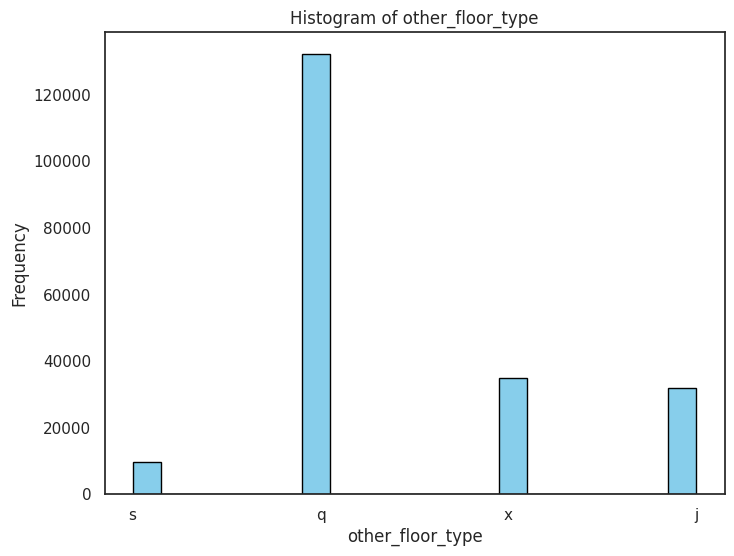

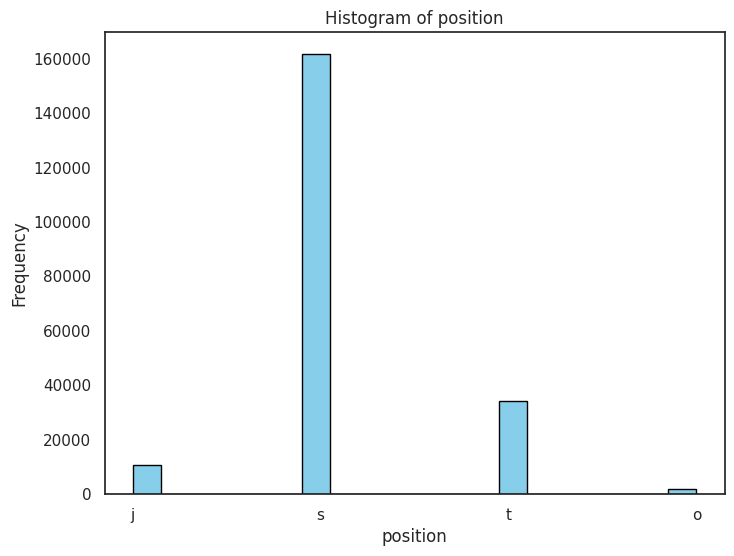

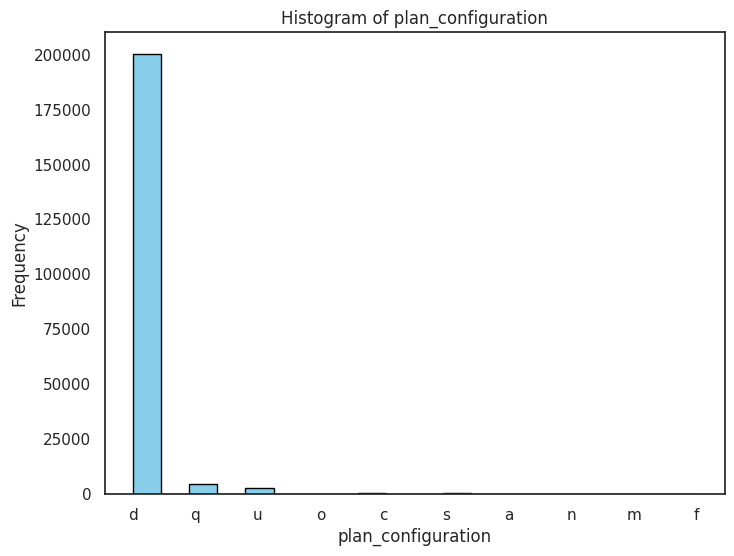

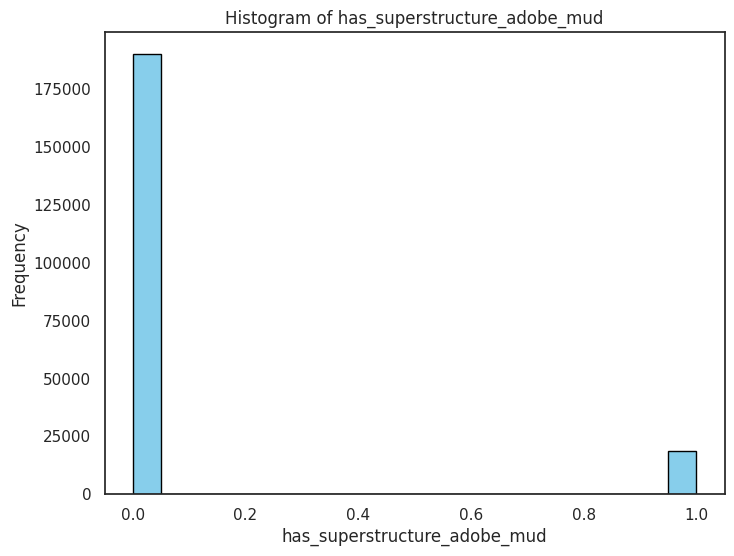

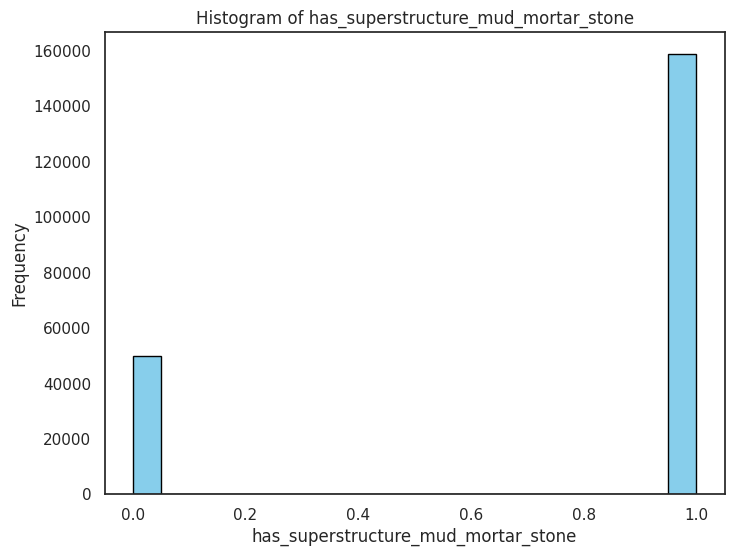

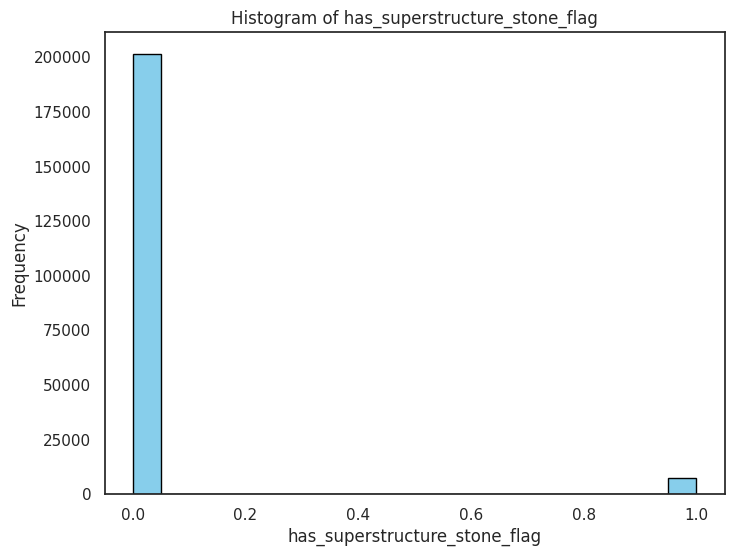

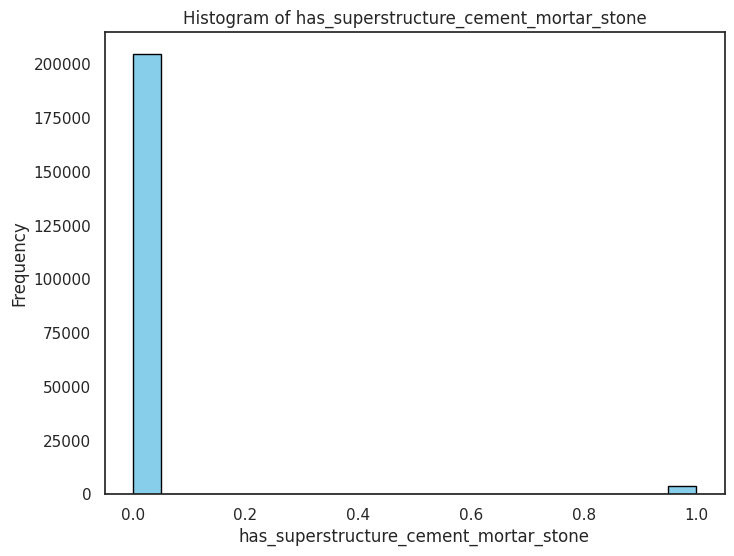

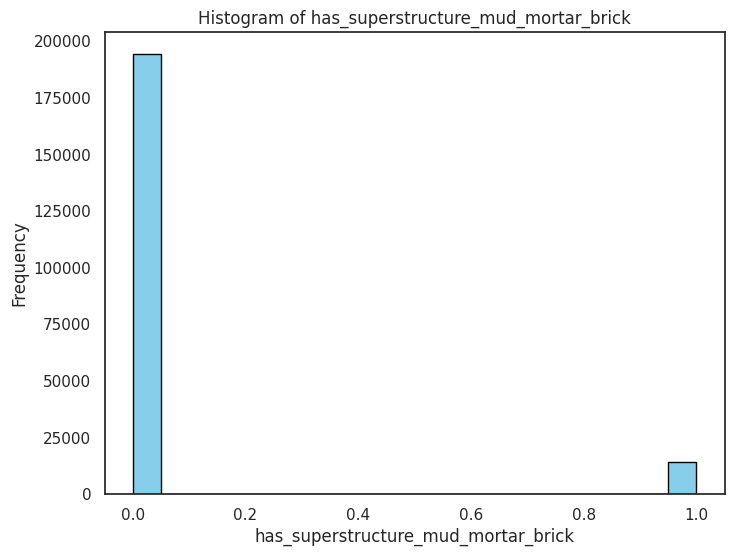

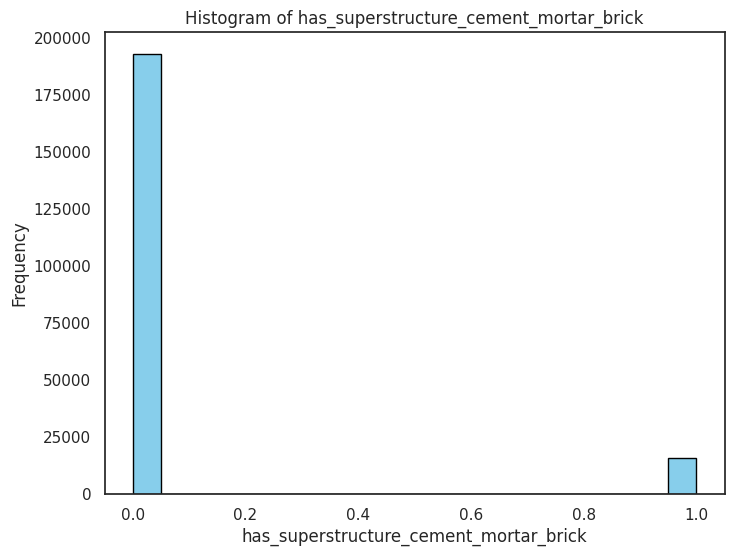

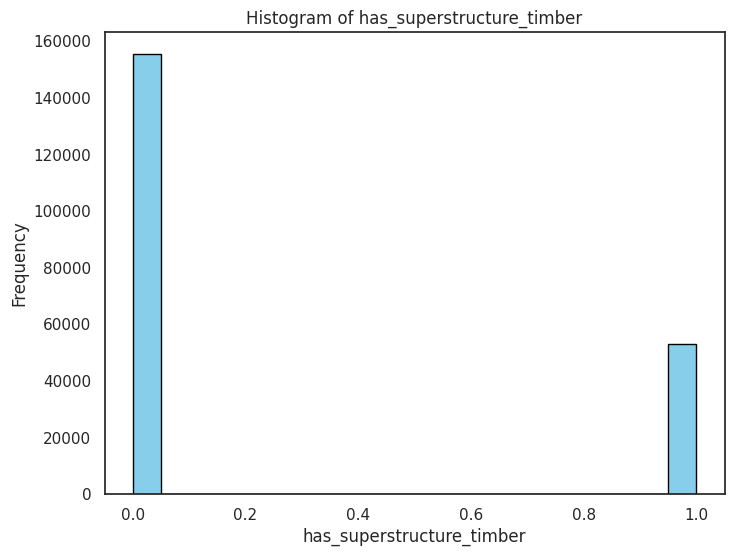

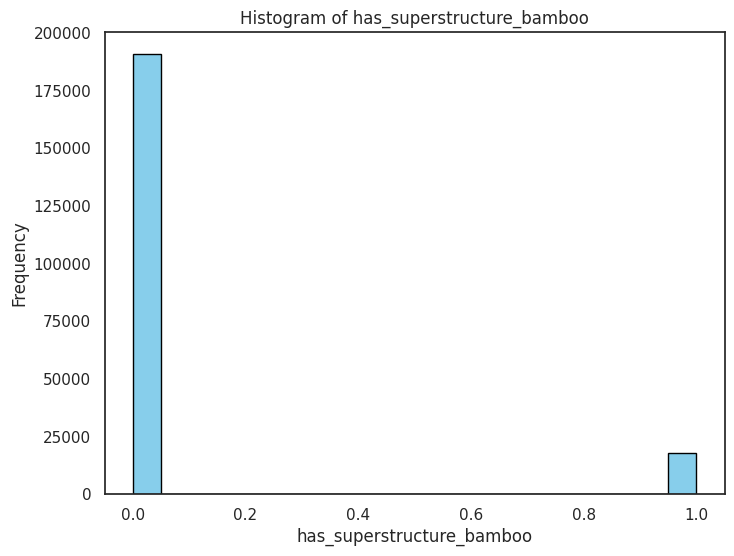

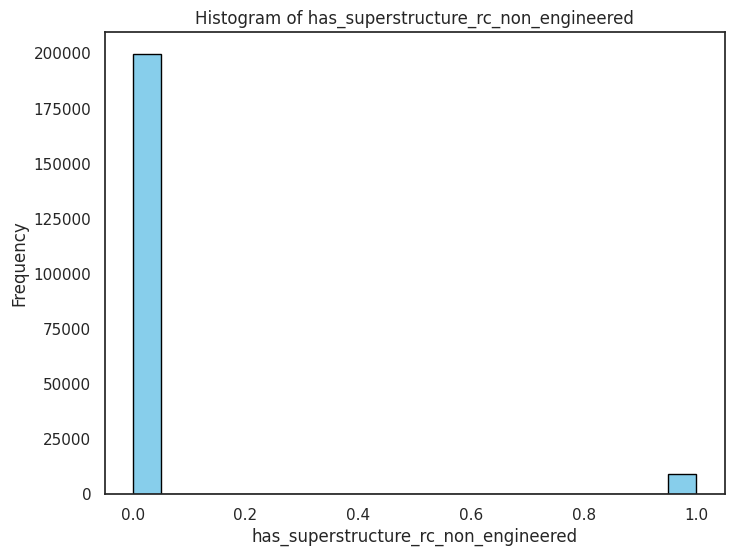

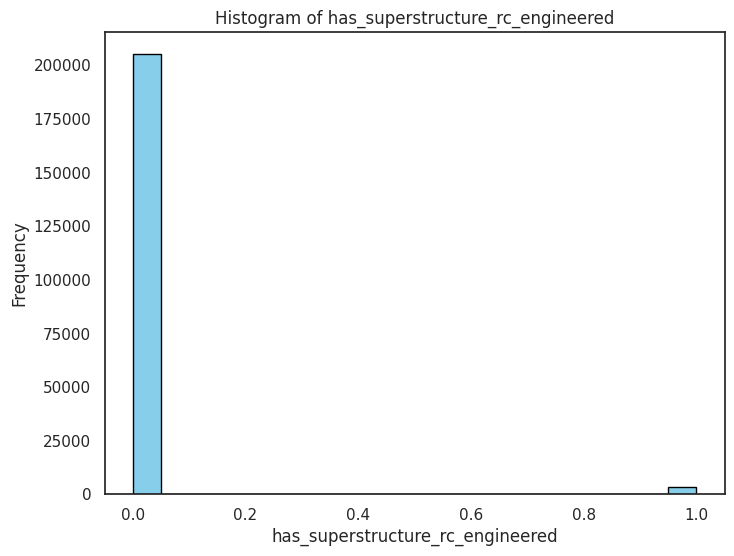

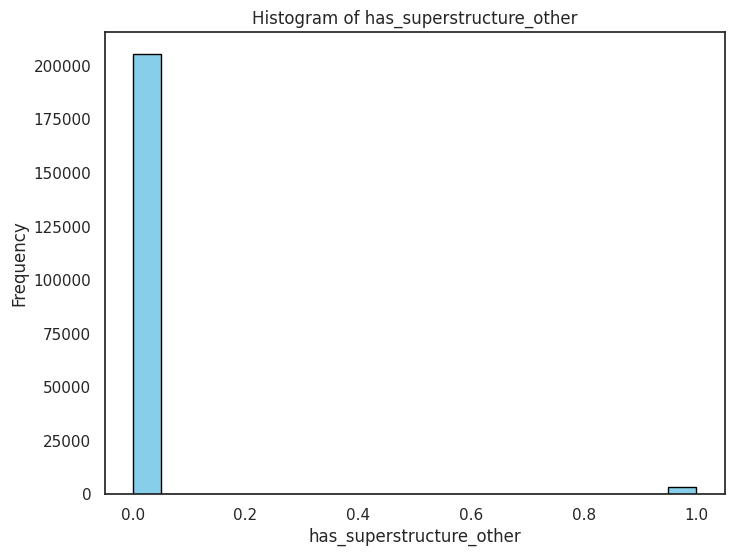

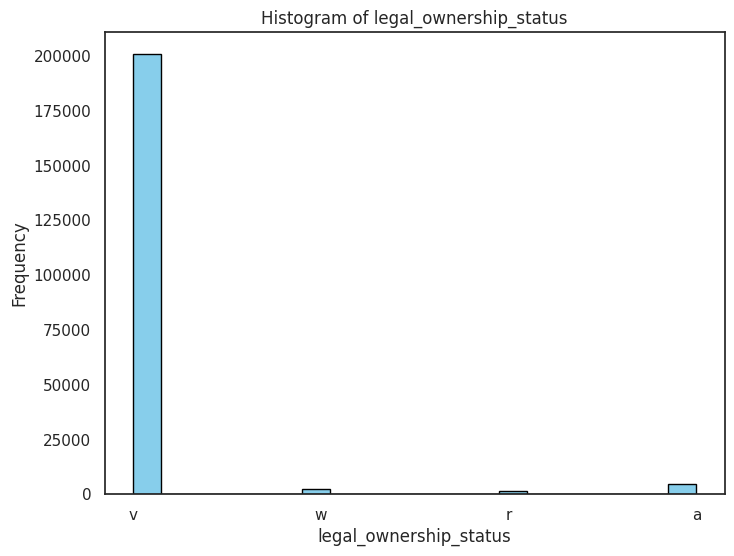

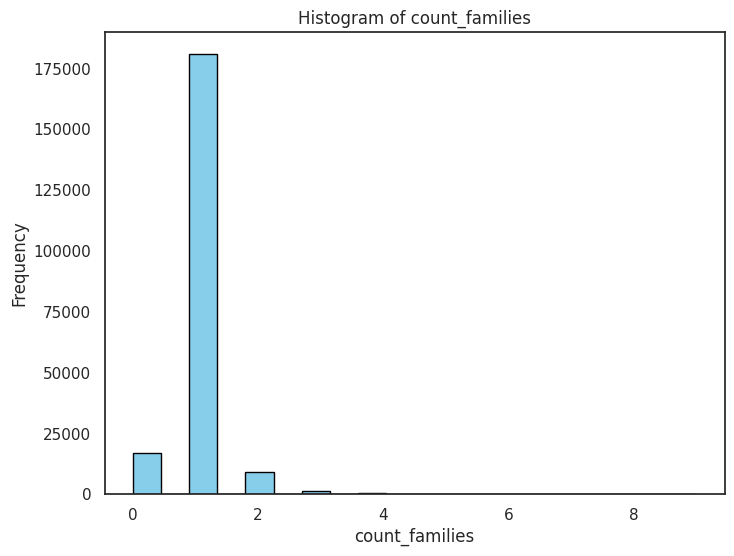

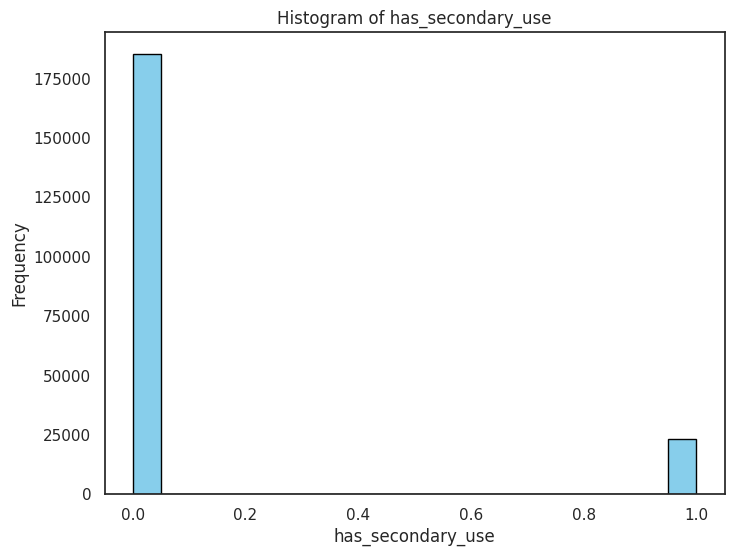

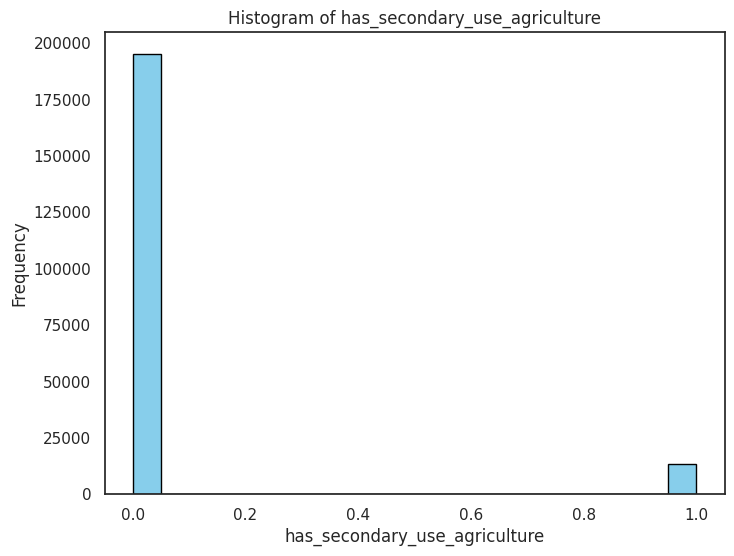

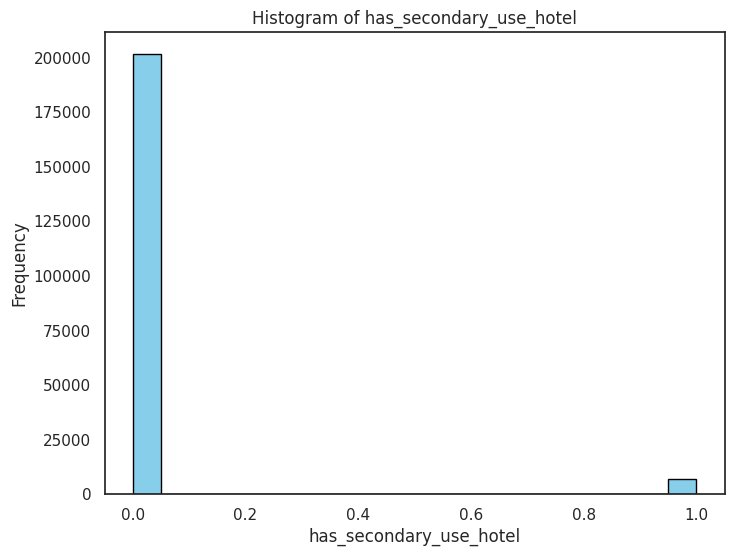

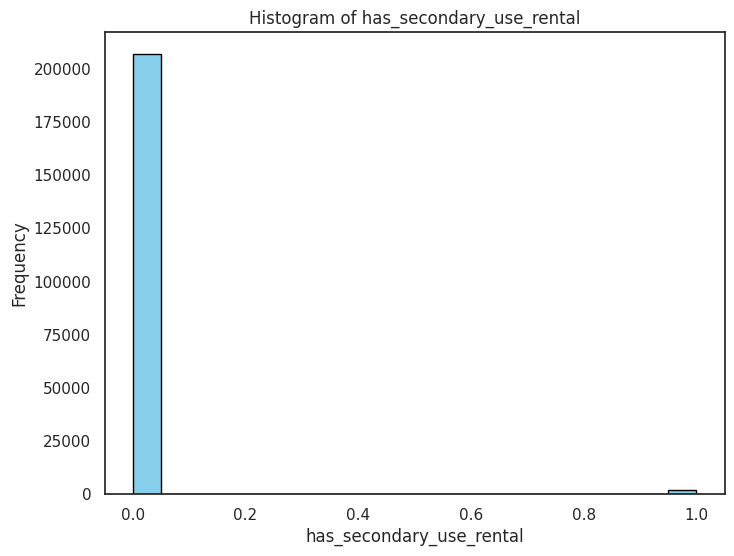

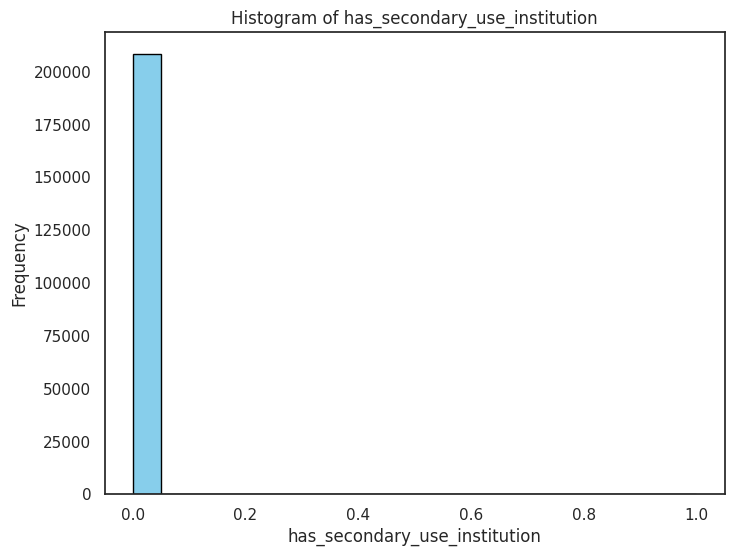

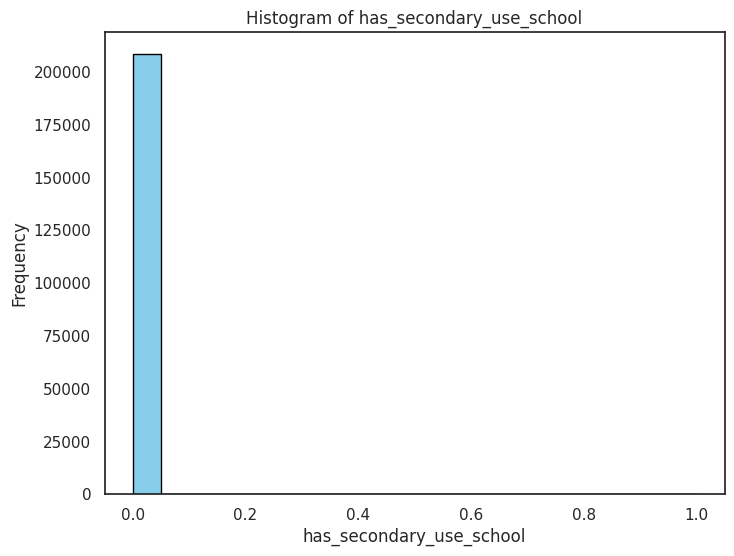

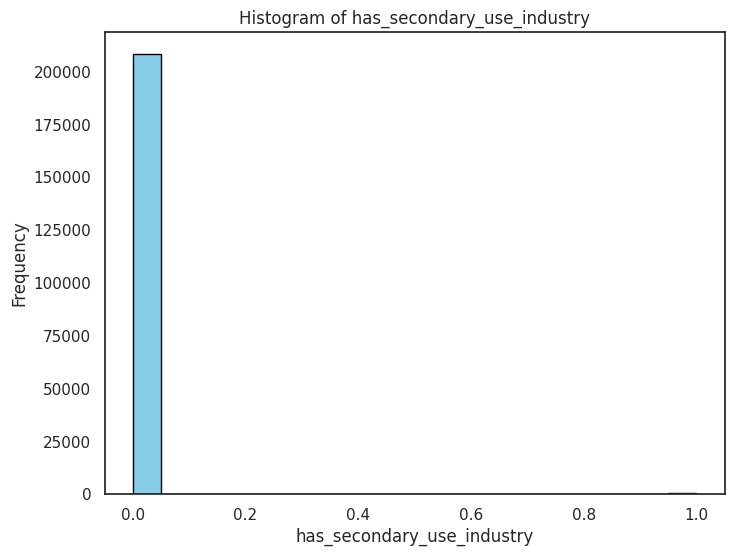

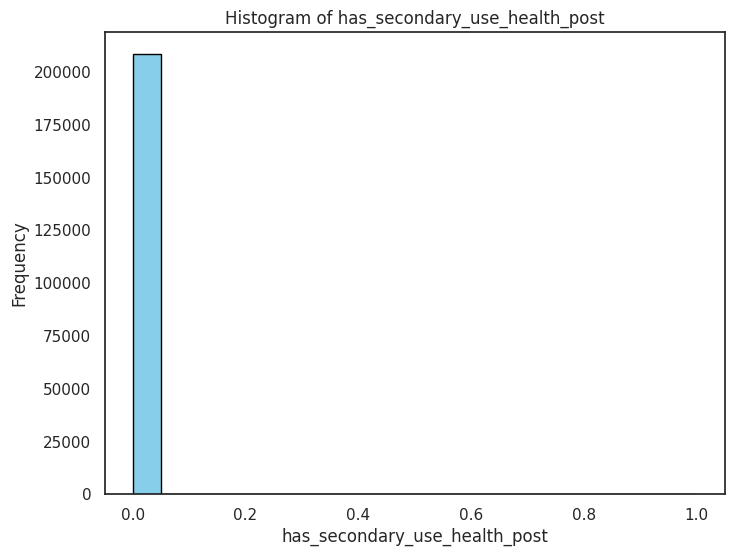

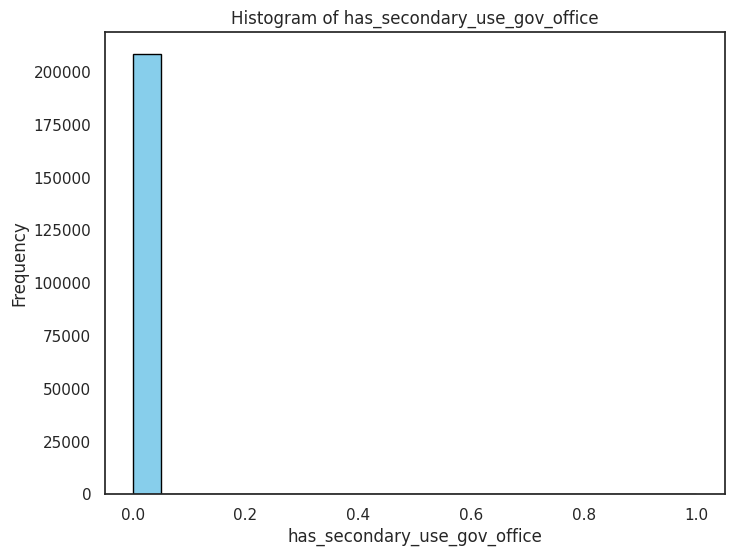

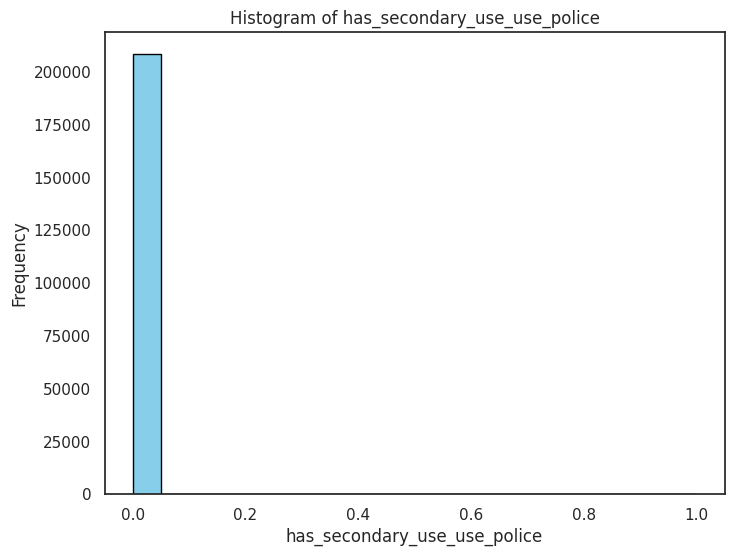

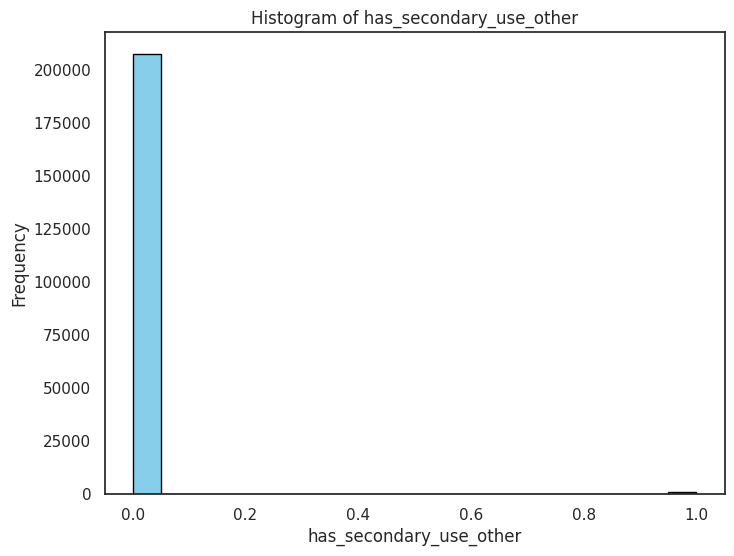

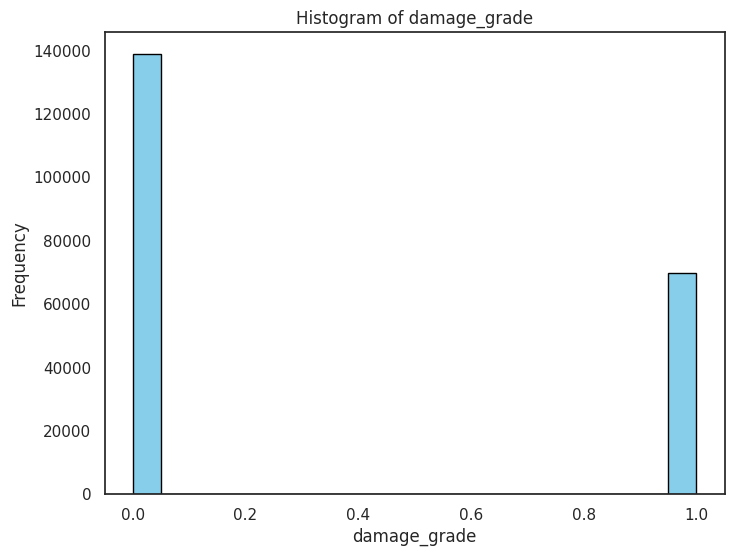

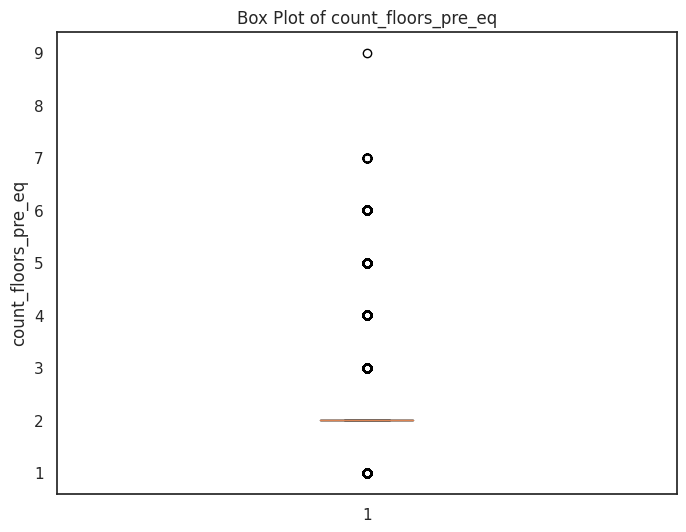

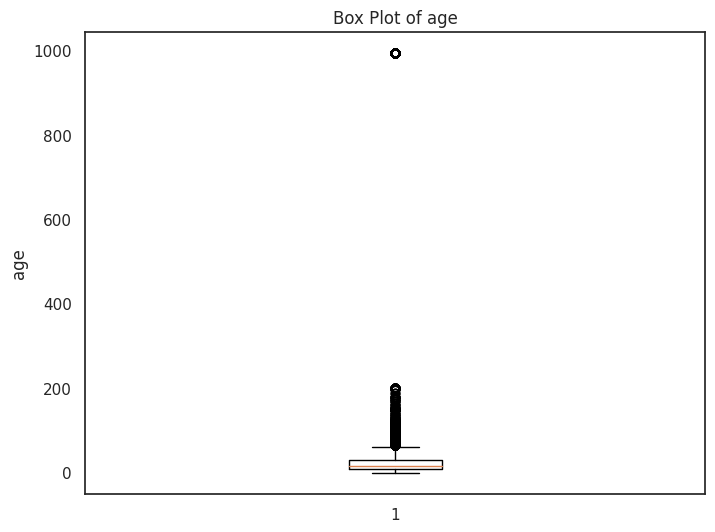

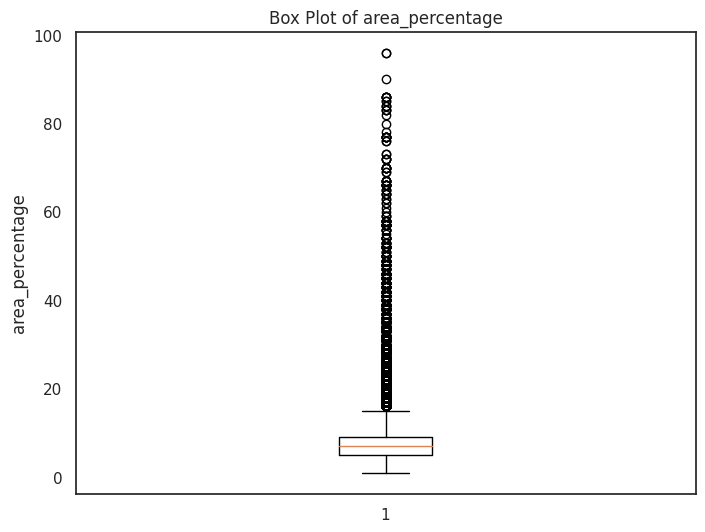

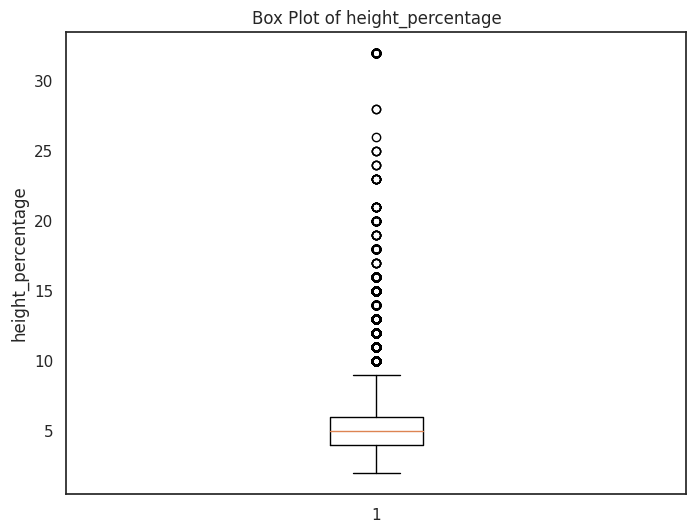

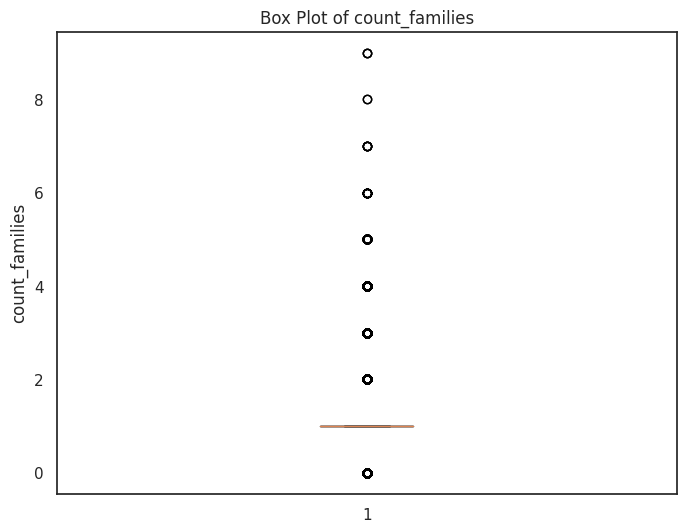

has_superstructure_adobe_mud              0.023305
has_superstructure_mud_mortar_stone       0.179120
has_superstructure_stone_flag             0.055406
has_superstructure_cement_mortar_stone   -0.056283
has_superstructure_mud_mortar_brick      -0.016096
has_superstructure_cement_mortar_brick   -0.168319
has_superstructure_timber                -0.067068
has_superstructure_bamboo                -0.060710
has_superstructure_rc_non_engineered     -0.093401
has_superstructure_rc_engineered         -0.084553
has_superstructure_other                 -0.022031
damage_grade                              1.000000
Name: damage_grade, dtype: float64
Exploratory Data Analysis for 'land_surface_condition':
Top 5 most common values: 
t    173450
n     28411
o      6619
Name: land_surface_condition, dtype: int64


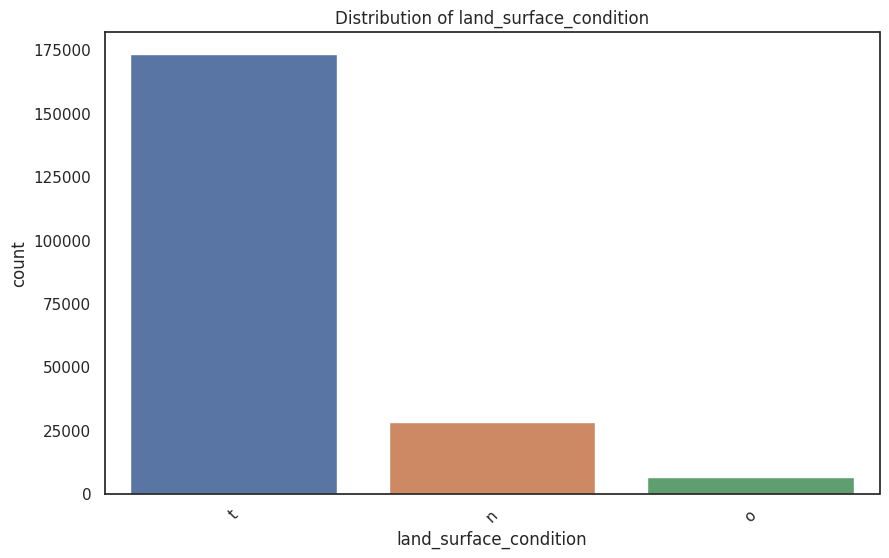

Exploratory Data Analysis for 'foundation_type':
Top 5 most common values: 
r    175324
w     12123
u     11423
i      8448
h      1162
Name: foundation_type, dtype: int64


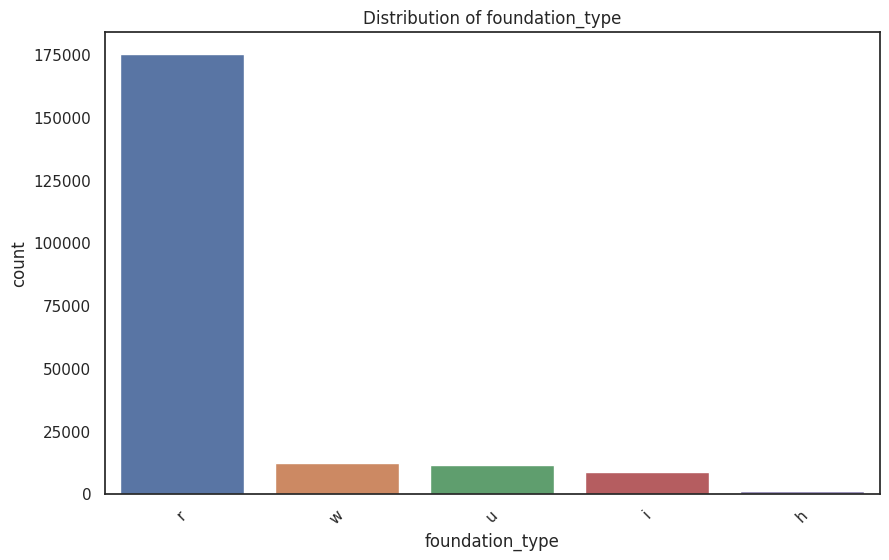

Exploratory Data Analysis for 'roof_type':
Top 5 most common values: 
n    146259
q     49314
x     12907
Name: roof_type, dtype: int64


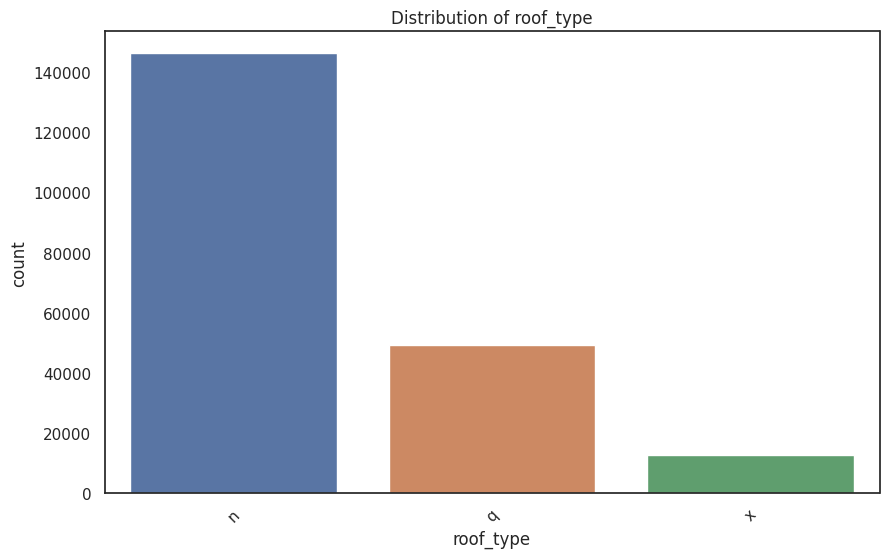

Exploratory Data Analysis for 'ground_floor_type':
Top 5 most common values: 
f    167624
x     19942
v     19681
z       821
m       412
Name: ground_floor_type, dtype: int64


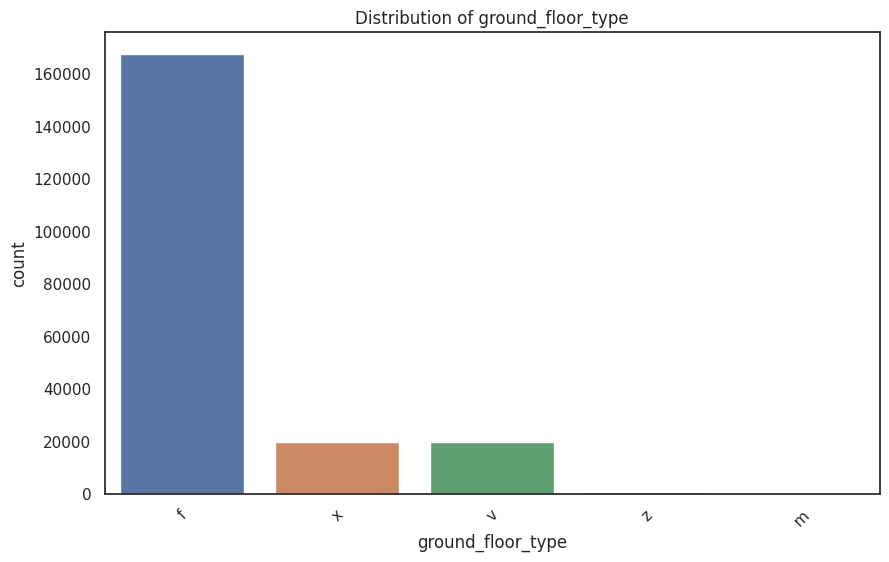

Exploratory Data Analysis for 'other_floor_type':
Top 5 most common values: 
q    132157
x     34807
j     31881
s      9635
Name: other_floor_type, dtype: int64


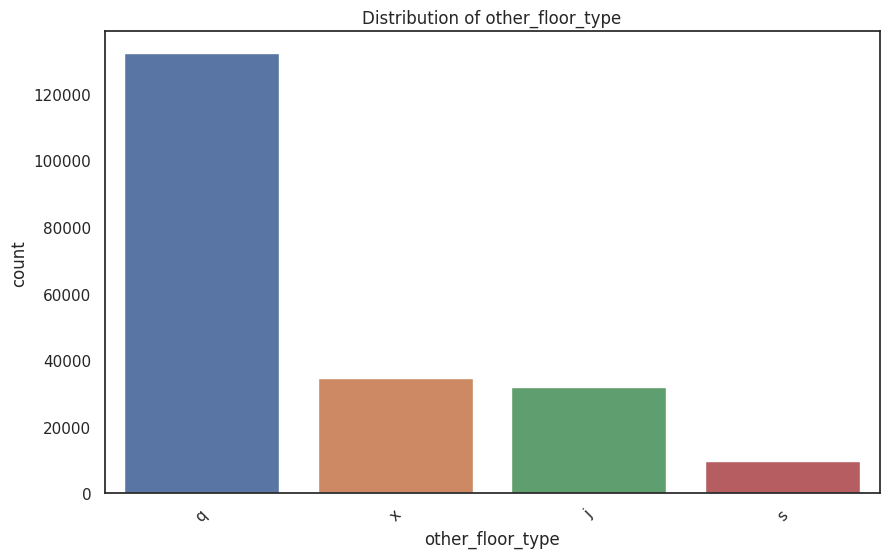

Exploratory Data Analysis for 'position':
Top 5 most common values: 
s    161585
t     34340
j     10719
o      1836
Name: position, dtype: int64


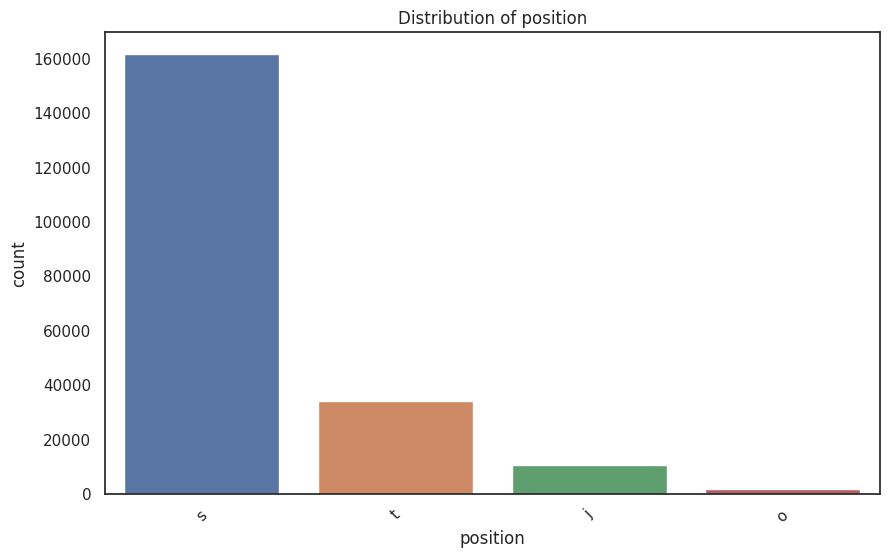

Exploratory Data Analysis for 'plan_configuration':
Top 5 most common values: 
d    200114
q      4512
u      2917
s       279
c       245
Name: plan_configuration, dtype: int64


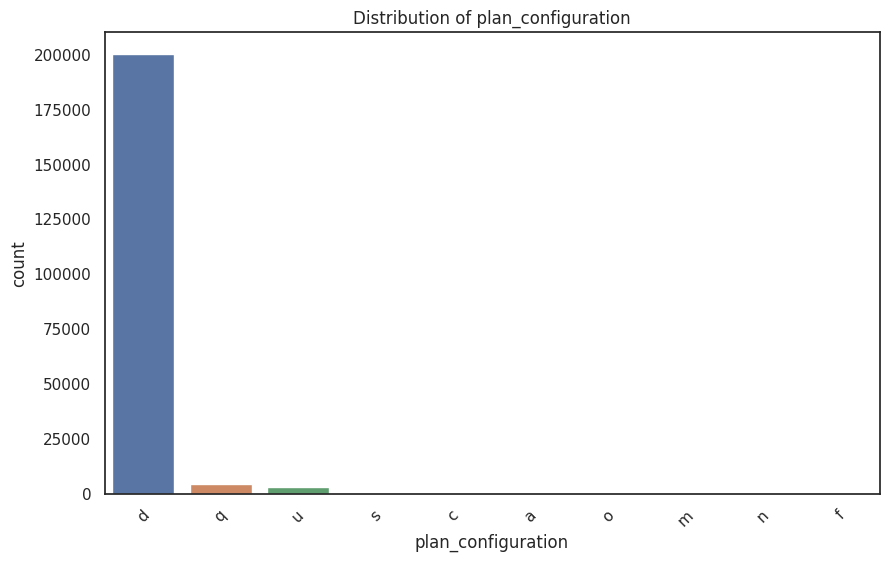

Exploratory Data Analysis for 'legal_ownership_status':
Top 5 most common values: 
v    200753
a      4391
w      2159
r      1177
Name: legal_ownership_status, dtype: int64


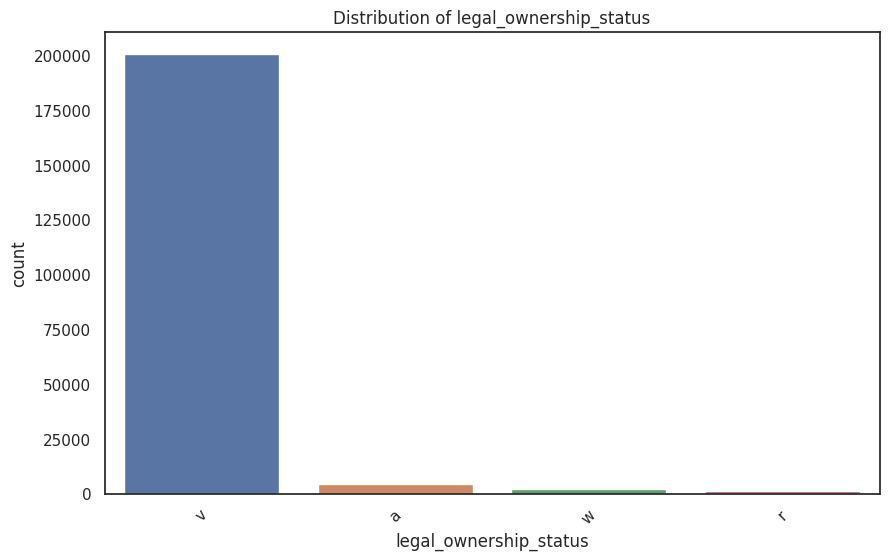

Exploratory Data Analysis for 'building_id':
Summary Statistics:
count    208480.000000
mean     230315.056509
std       75224.174815
min      100001.000000
25%      165207.750000
50%      230412.500000
75%      295377.500000
max      360601.000000
Name: building_id, dtype: float64


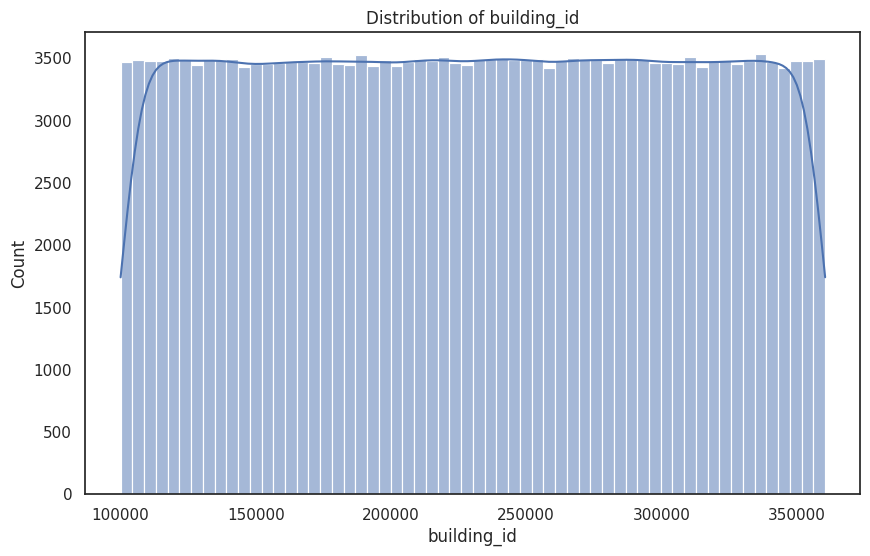

Exploratory Data Analysis for 'geo_level_1_id':
Summary Statistics:
count    208480.000000
mean         13.900979
std           8.041721
min           0.000000
25%           7.000000
50%          12.000000
75%          21.000000
max          30.000000
Name: geo_level_1_id, dtype: float64


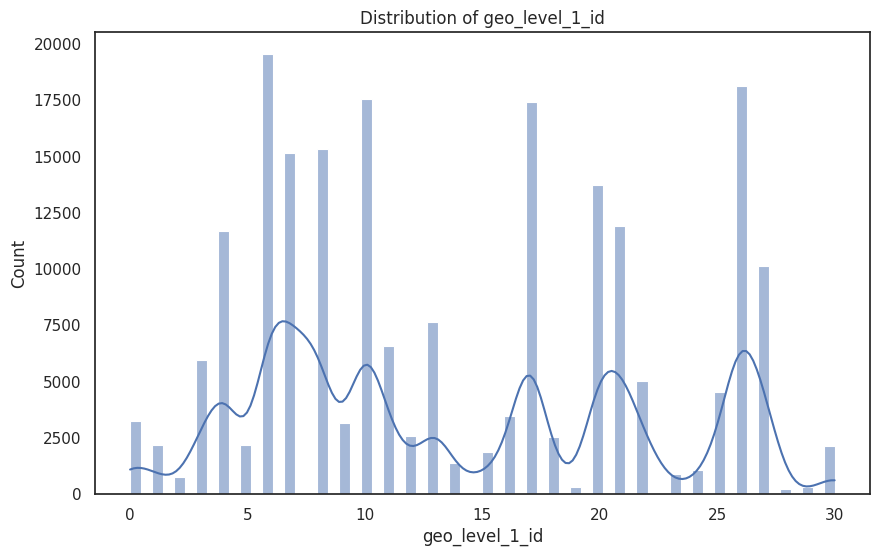

Exploratory Data Analysis for 'geo_level_2_id':
Summary Statistics:
count    208480.000000
mean        701.049477
std         412.708954
min           0.000000
25%         349.000000
50%         703.000000
75%        1050.000000
max        1427.000000
Name: geo_level_2_id, dtype: float64


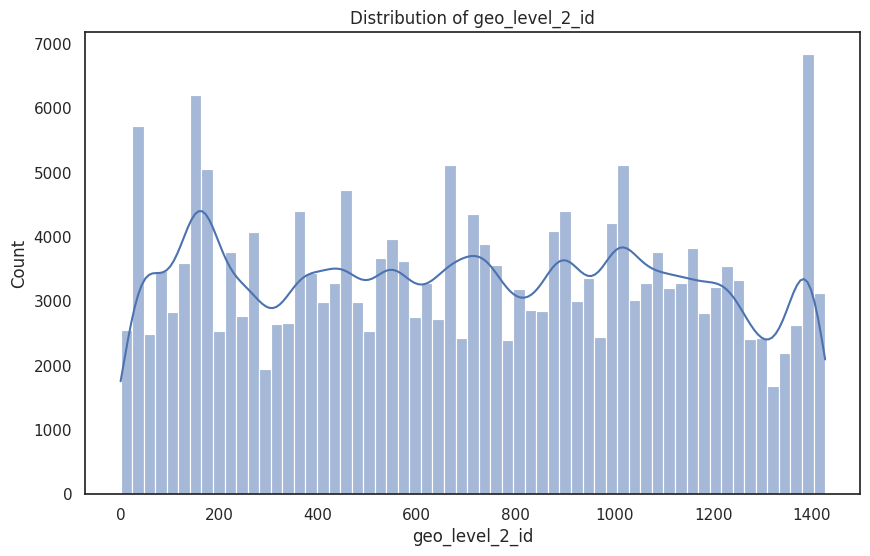

Exploratory Data Analysis for 'geo_level_3_id':
Summary Statistics:
count    208480.000000
mean       6260.862869
std        3646.147665
min           0.000000
25%        3073.000000
50%        6280.000000
75%        9412.000000
max       12567.000000
Name: geo_level_3_id, dtype: float64


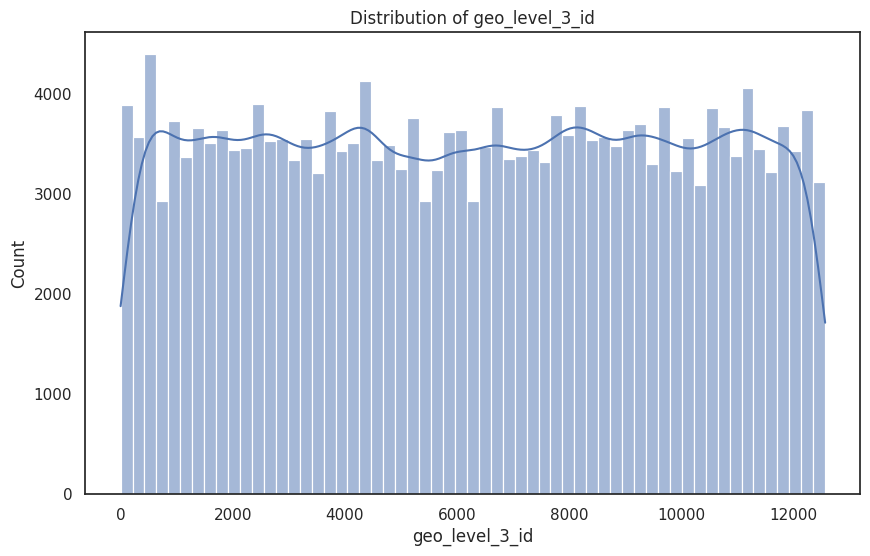

Exploratory Data Analysis for 'count_floors_pre_eq':
Summary Statistics:
count    208480.000000
mean          2.129729
std           0.727376
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64


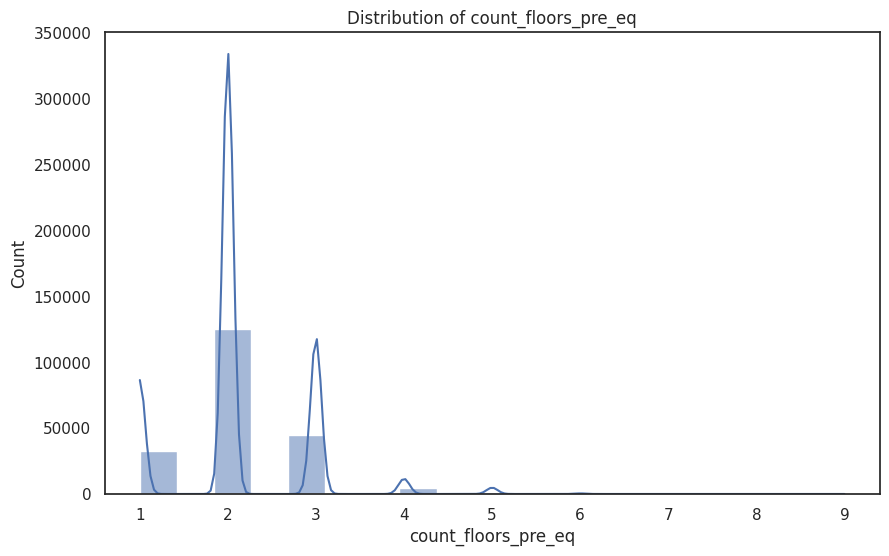

Exploratory Data Analysis for 'age':
Summary Statistics:
count    208480.000000
mean         26.633490
std          74.119612
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64


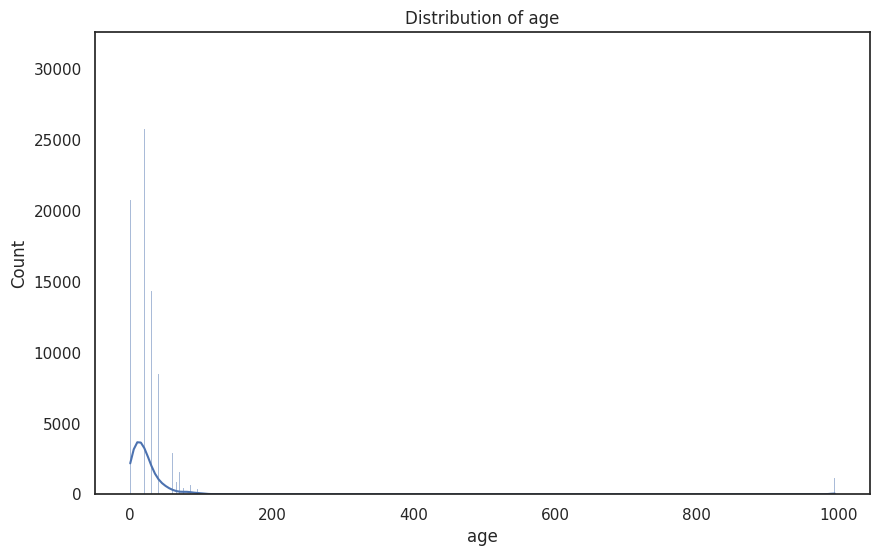

Exploratory Data Analysis for 'area_percentage':
Summary Statistics:
count    208480.000000
mean          8.022794
std           4.399647
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max          96.000000
Name: area_percentage, dtype: float64


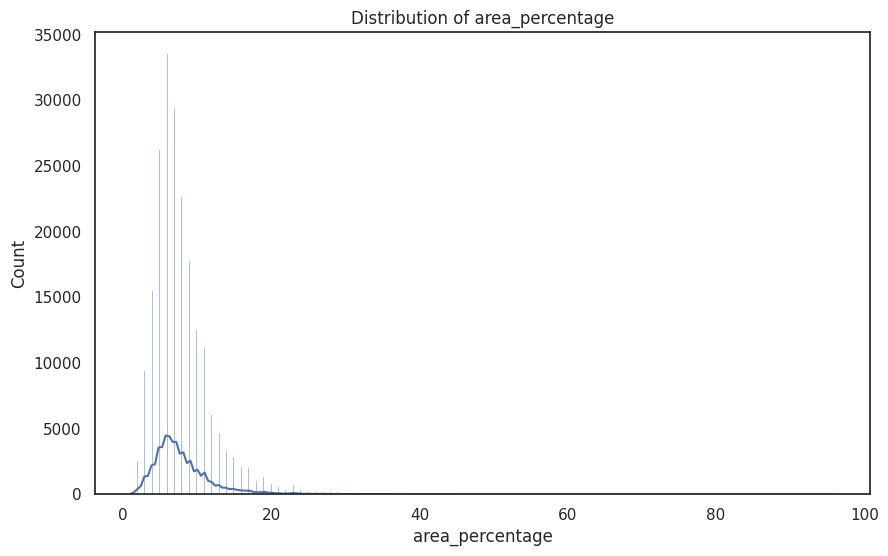

Exploratory Data Analysis for 'height_percentage':
Summary Statistics:
count    208480.000000
mean          5.434459
std           1.914803
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64


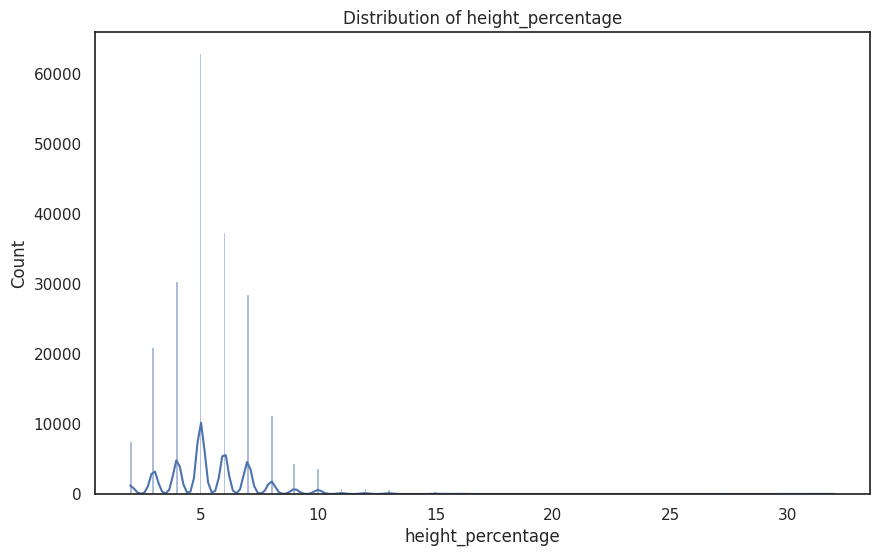

Exploratory Data Analysis for 'has_superstructure_adobe_mud':
Summary Statistics:
count    208480.000000
mean          0.088757
std           0.284393
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_adobe_mud, dtype: float64


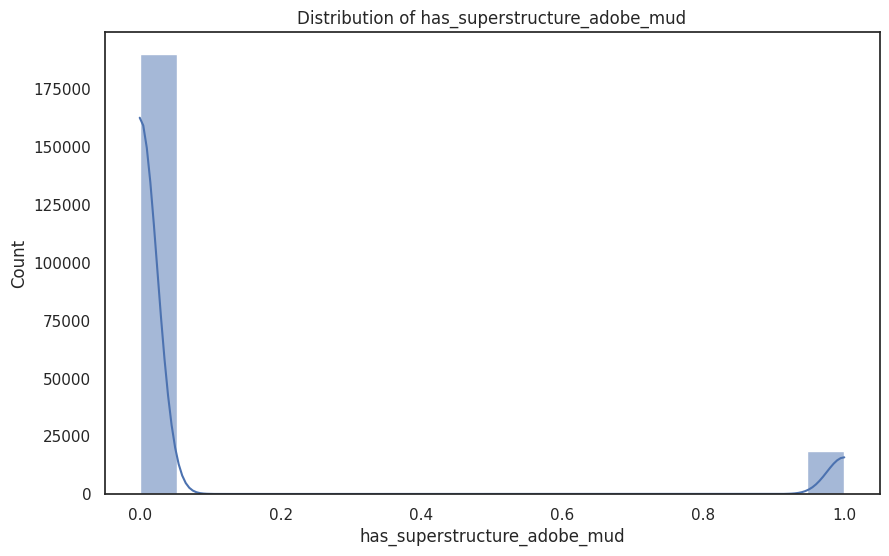

Exploratory Data Analysis for 'has_superstructure_mud_mortar_stone':
Summary Statistics:
count    208480.000000
mean          0.761852
std           0.425951
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: has_superstructure_mud_mortar_stone, dtype: float64


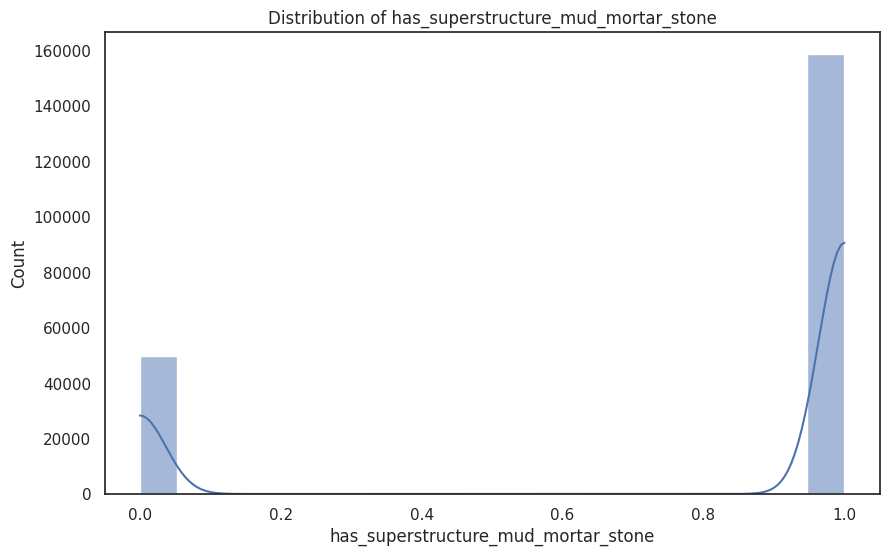

Exploratory Data Analysis for 'has_superstructure_stone_flag':
Summary Statistics:
count    208480.000000
mean          0.034281
std           0.181952
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_stone_flag, dtype: float64


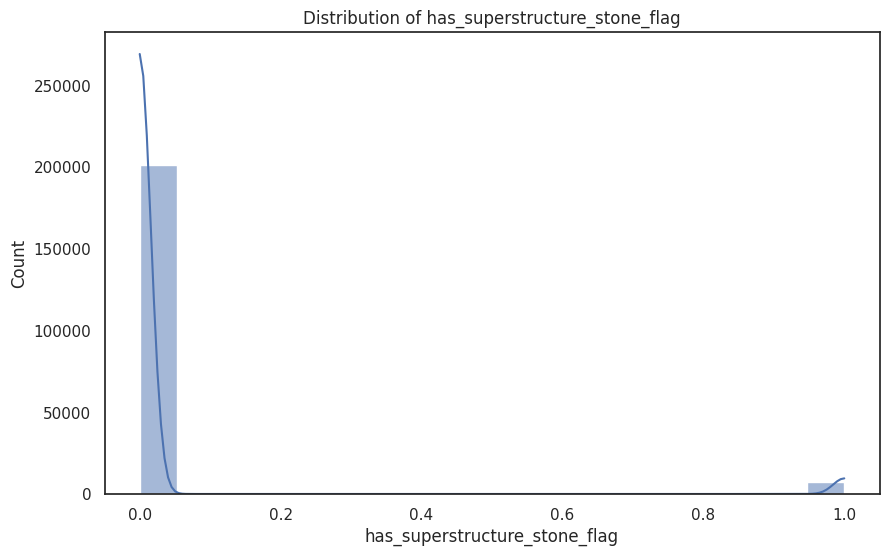

Exploratory Data Analysis for 'has_superstructure_cement_mortar_stone':
Summary Statistics:
count    208480.000000
mean          0.018256
std           0.133876
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_cement_mortar_stone, dtype: float64


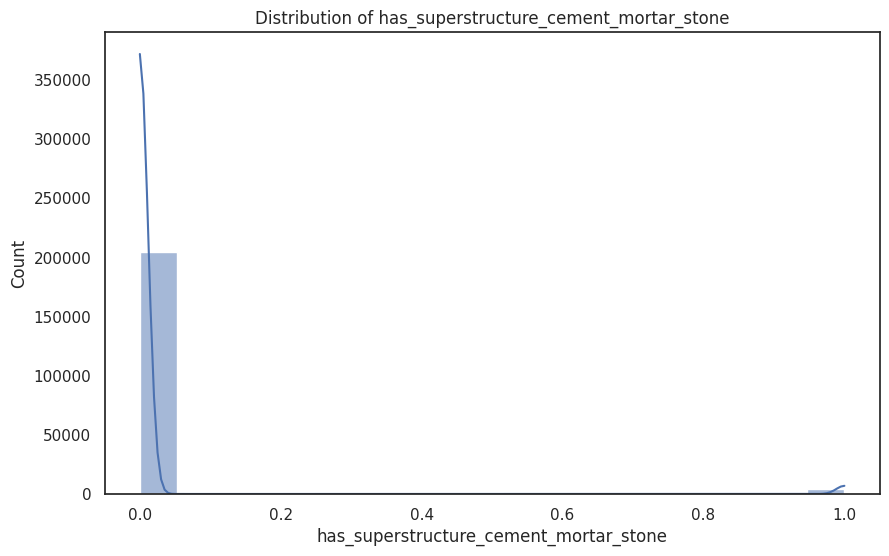

Exploratory Data Analysis for 'has_superstructure_mud_mortar_brick':
Summary Statistics:
count    208480.000000
mean          0.068232
std           0.252144
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_mud_mortar_brick, dtype: float64


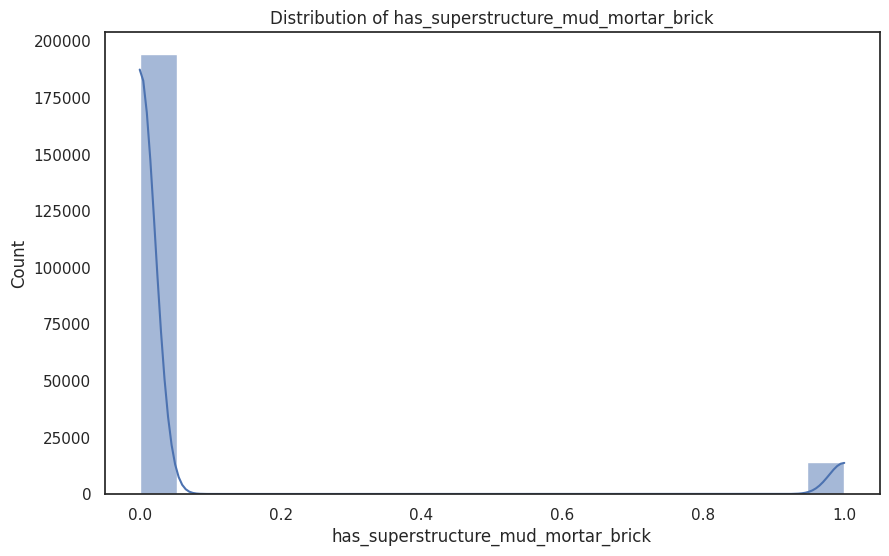

Exploratory Data Analysis for 'has_superstructure_cement_mortar_brick':
Summary Statistics:
count    208480.000000
mean          0.075307
std           0.263887
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_cement_mortar_brick, dtype: float64


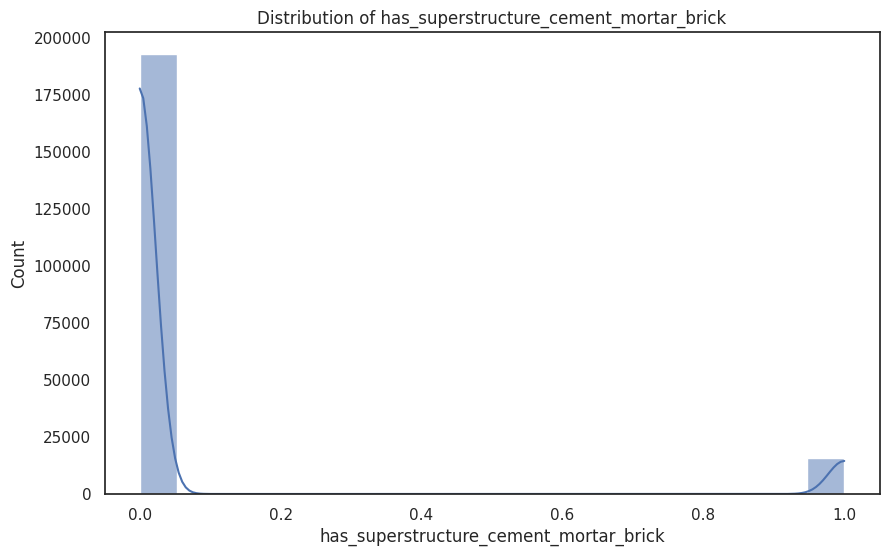

Exploratory Data Analysis for 'has_superstructure_timber':
Summary Statistics:
count    208480.000000
mean          0.254658
std           0.435670
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: has_superstructure_timber, dtype: float64


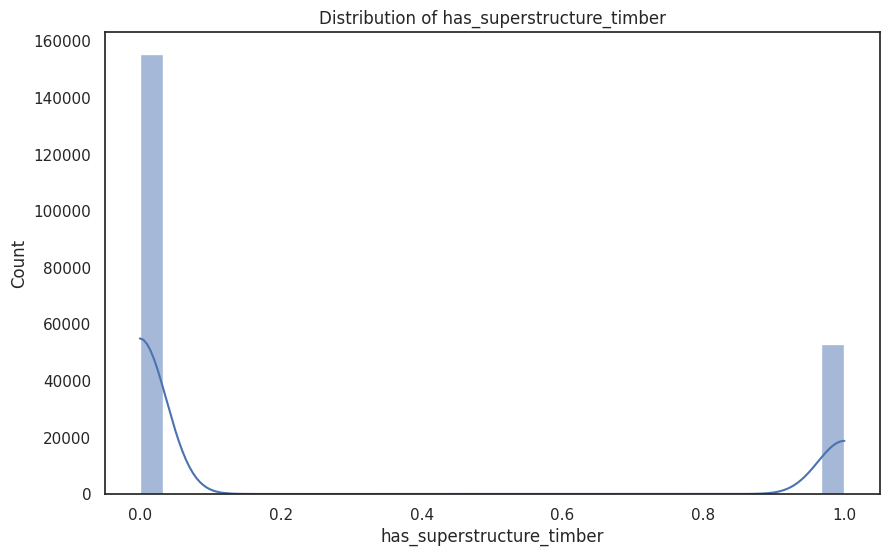

Exploratory Data Analysis for 'has_superstructure_bamboo':
Summary Statistics:
count    208480.000000
mean          0.084713
std           0.278455
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_bamboo, dtype: float64


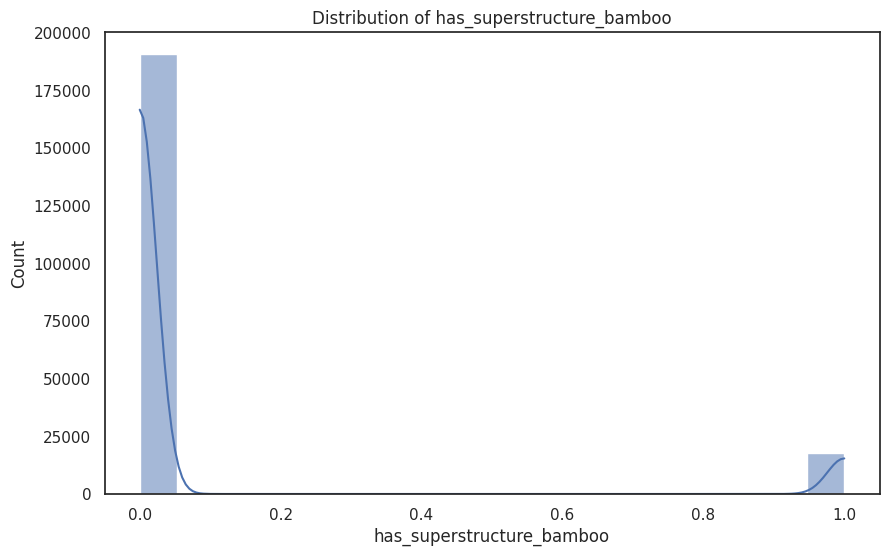

Exploratory Data Analysis for 'has_superstructure_rc_non_engineered':
Summary Statistics:
count    208480.000000
mean          0.042637
std           0.202038
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_rc_non_engineered, dtype: float64


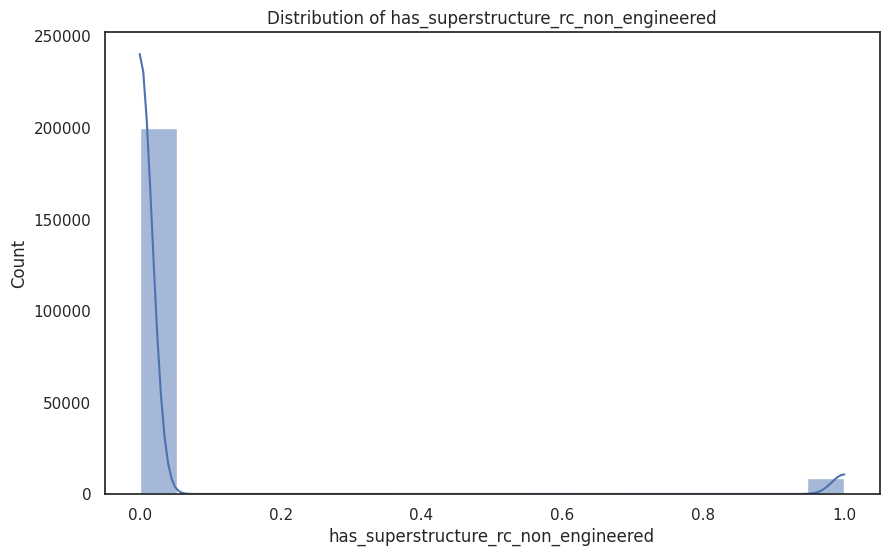

Exploratory Data Analysis for 'has_superstructure_rc_engineered':
Summary Statistics:
count    208480.000000
mean          0.015747
std           0.124497
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_rc_engineered, dtype: float64


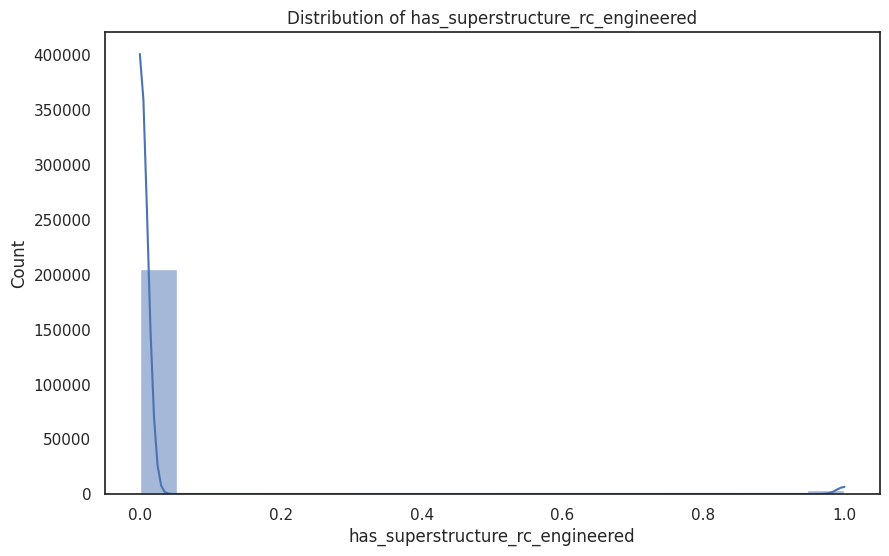

Exploratory Data Analysis for 'has_superstructure_other':
Summary Statistics:
count    208480.000000
mean          0.014889
std           0.121108
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_superstructure_other, dtype: float64


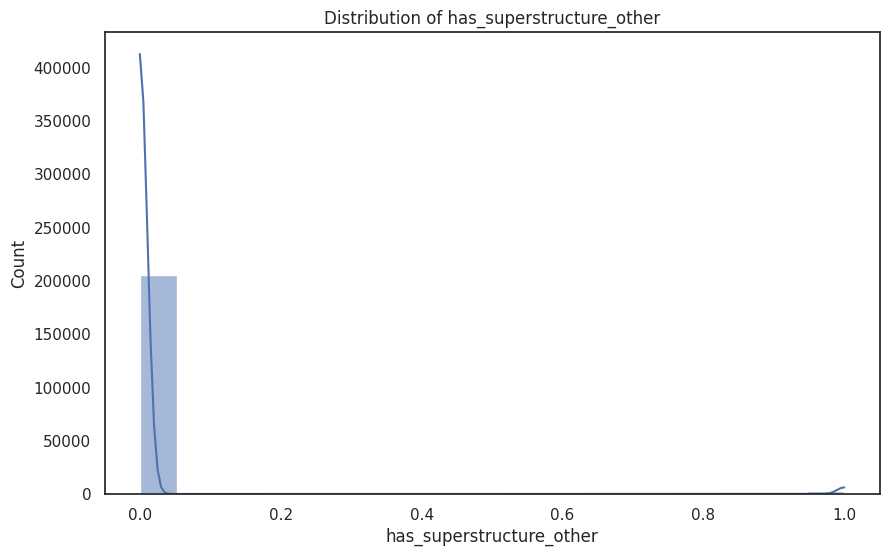

Exploratory Data Analysis for 'count_families':
Summary Statistics:
count    208480.000000
mean          0.983749
std           0.418027
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: count_families, dtype: float64


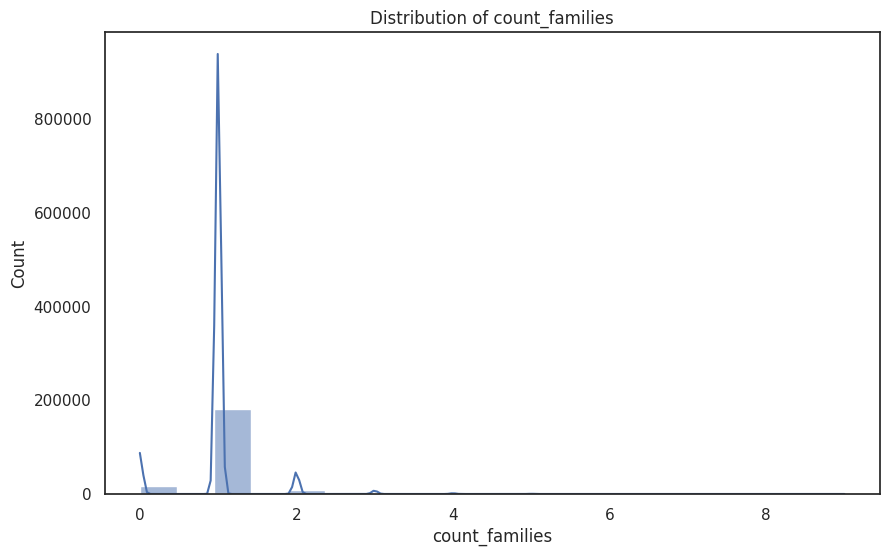

Exploratory Data Analysis for 'has_secondary_use':
Summary Statistics:
count    208480.000000
mean          0.111402
std           0.314630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use, dtype: float64


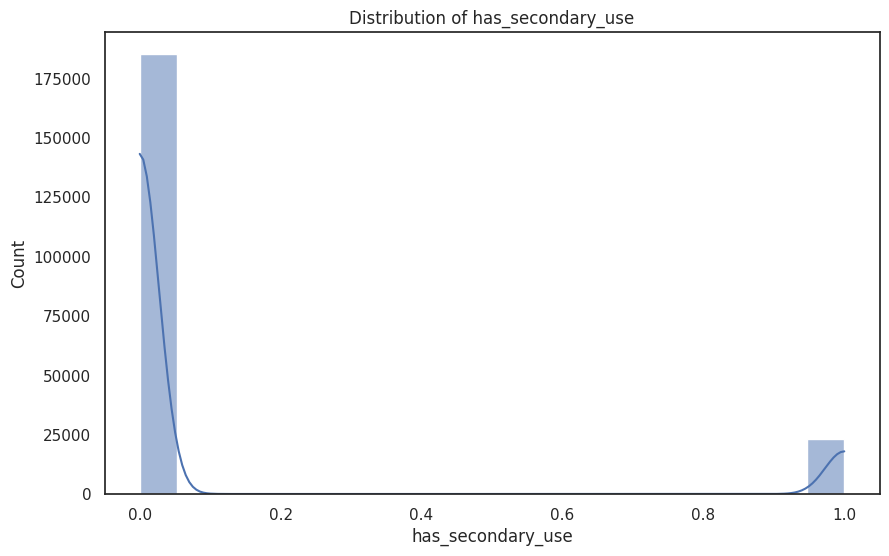

Exploratory Data Analysis for 'has_secondary_use_agriculture':
Summary Statistics:
count    208480.000000
mean          0.064203
std           0.245114
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_agriculture, dtype: float64


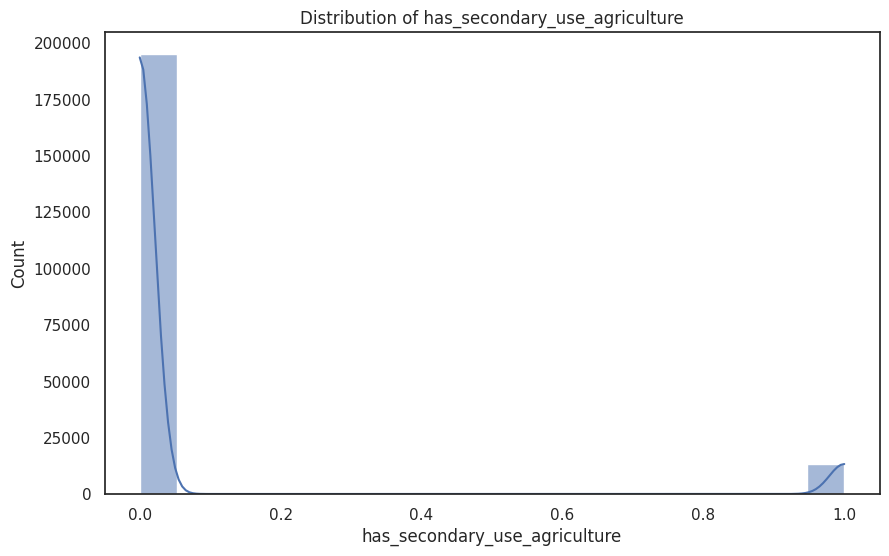

Exploratory Data Analysis for 'has_secondary_use_hotel':
Summary Statistics:
count    208480.000000
mean          0.033413
std           0.179714
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_hotel, dtype: float64


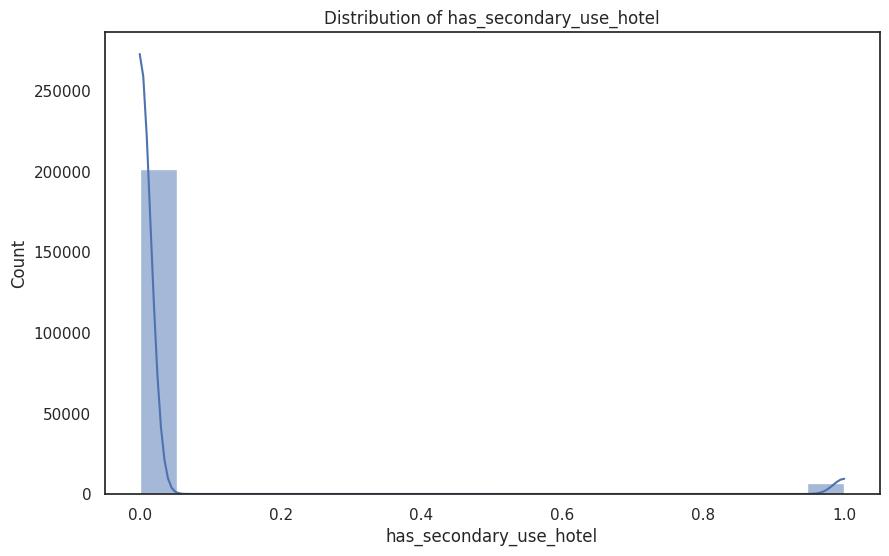

Exploratory Data Analysis for 'has_secondary_use_rental':
Summary Statistics:
count    208480.000000
mean          0.008010
std           0.089142
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_rental, dtype: float64


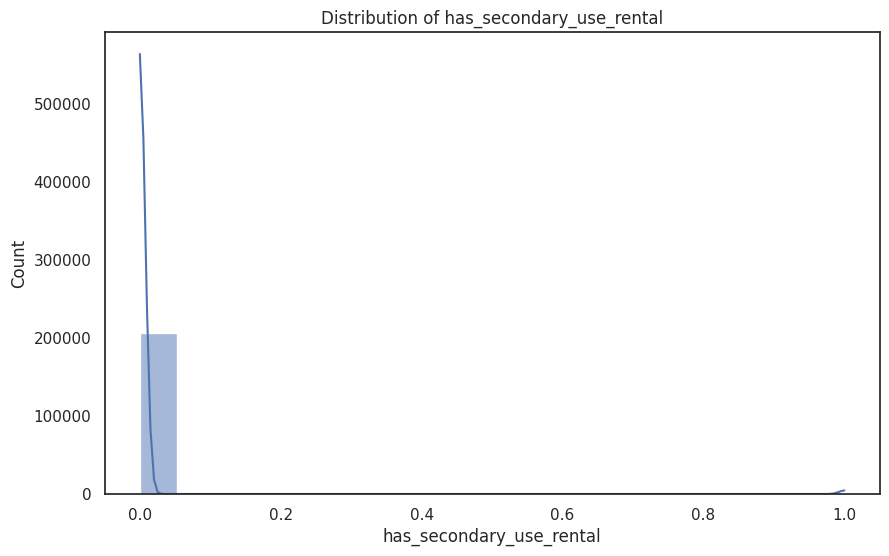

Exploratory Data Analysis for 'has_secondary_use_institution':
Summary Statistics:
count    208480.000000
mean          0.000950
std           0.030803
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_institution, dtype: float64


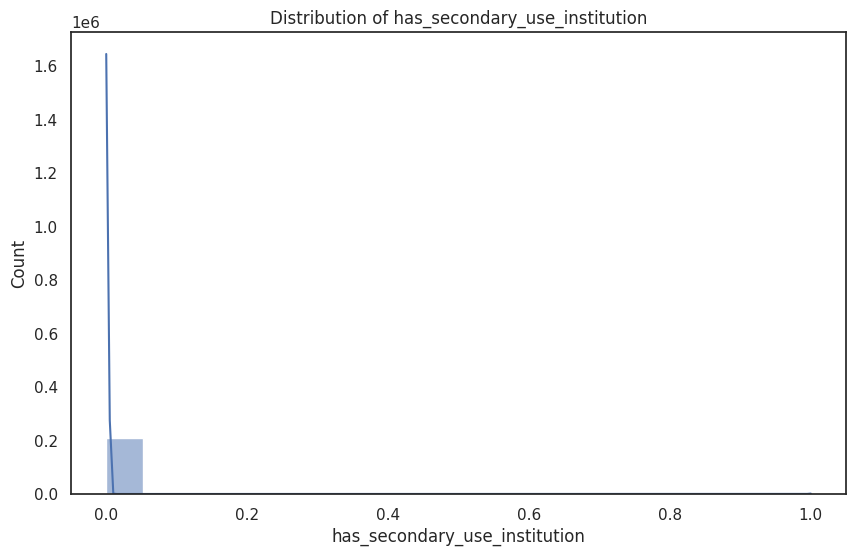

Exploratory Data Analysis for 'has_secondary_use_school':
Summary Statistics:
count    208480.000000
mean          0.000341
std           0.018451
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_school, dtype: float64


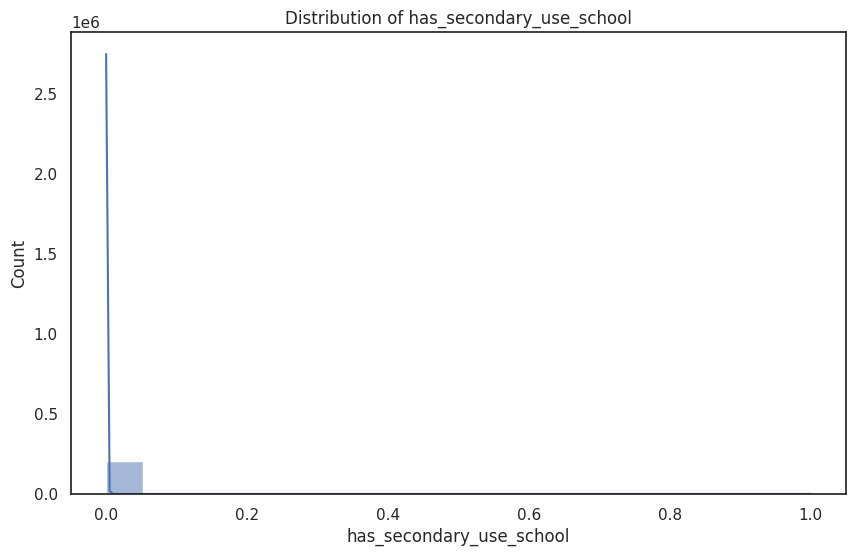

Exploratory Data Analysis for 'has_secondary_use_industry':
Summary Statistics:
count    208480.000000
mean          0.001103
std           0.033197
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_industry, dtype: float64


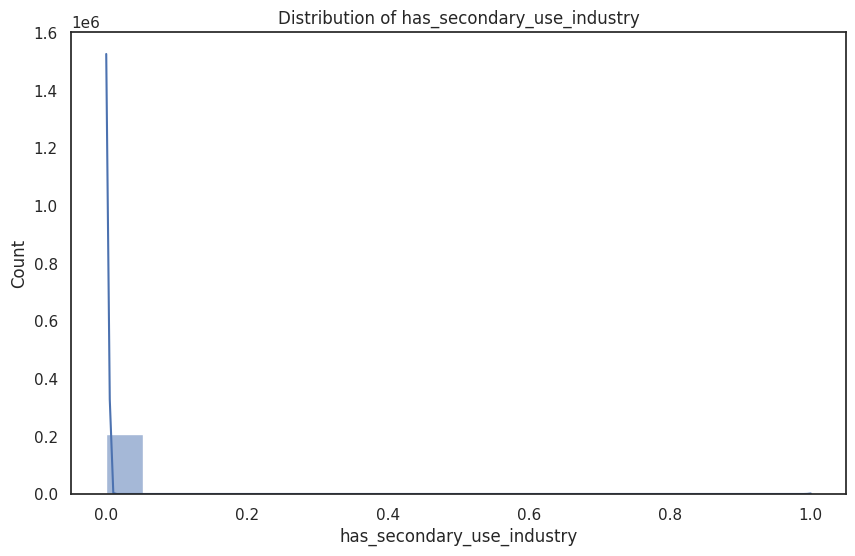

Exploratory Data Analysis for 'has_secondary_use_health_post':
Summary Statistics:
count    208480.000000
mean          0.000182
std           0.013500
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_health_post, dtype: float64


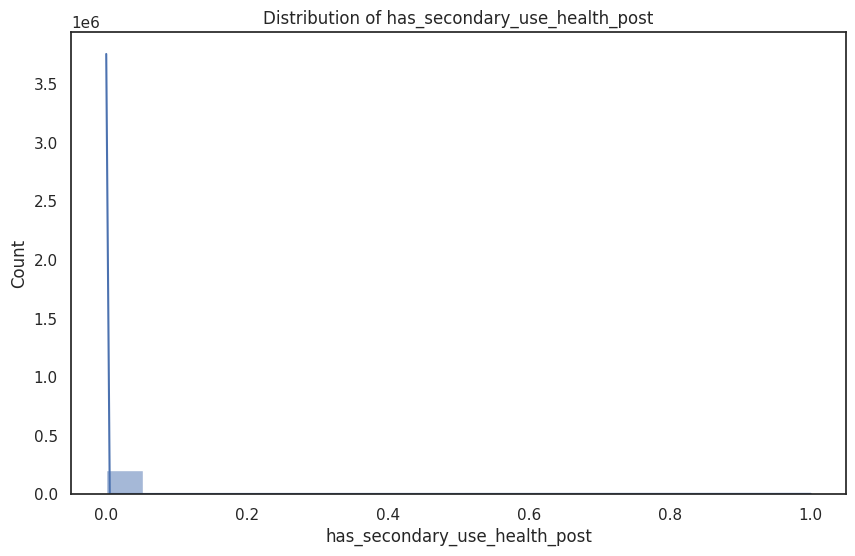

Exploratory Data Analysis for 'has_secondary_use_gov_office':
Summary Statistics:
count    208480.000000
mean          0.000153
std           0.012388
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_gov_office, dtype: float64


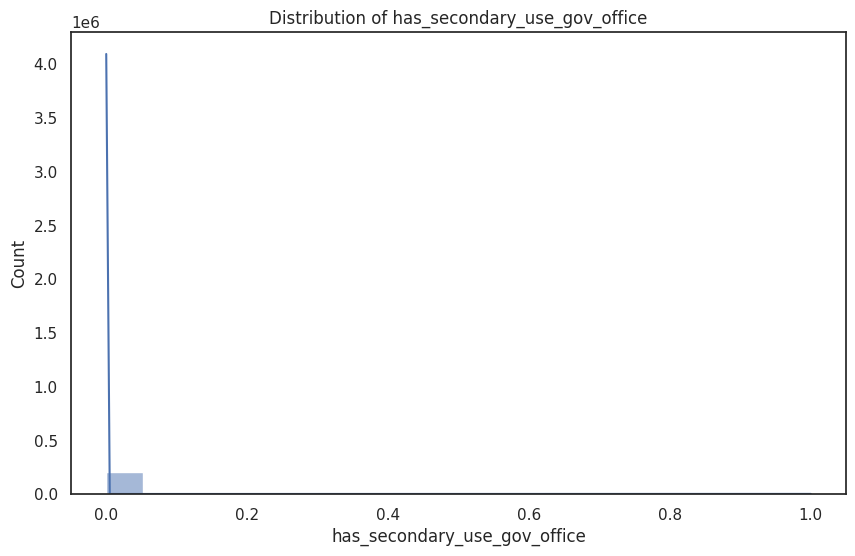

Exploratory Data Analysis for 'has_secondary_use_use_police':
Summary Statistics:
count    208480.000000
mean          0.000091
std           0.009546
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_use_police, dtype: float64


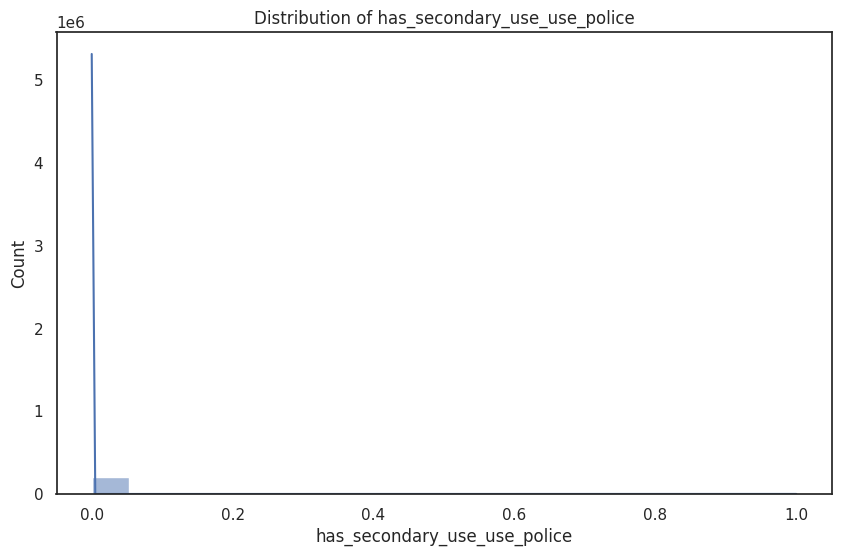

Exploratory Data Analysis for 'has_secondary_use_other':
Summary Statistics:
count    208480.000000
mean          0.005017
std           0.070655
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: has_secondary_use_other, dtype: float64


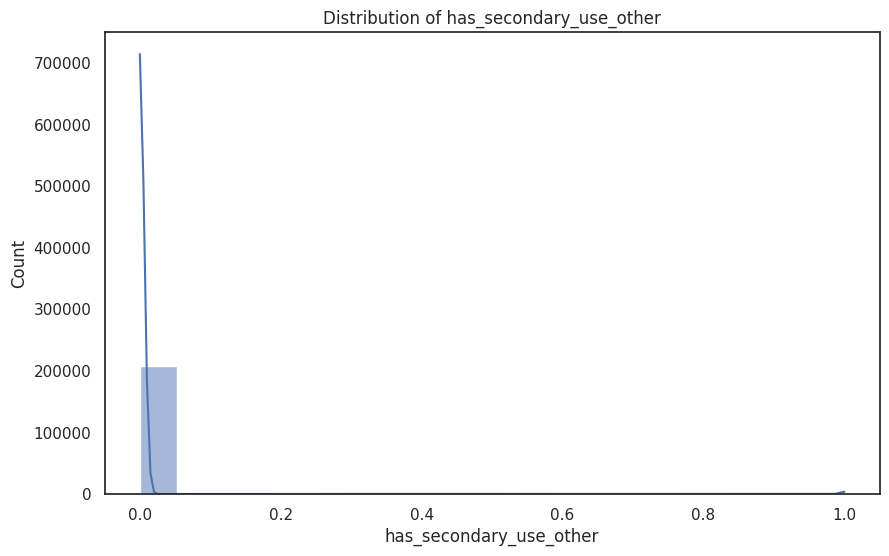

Exploratory Data Analysis for 'damage_grade':
Summary Statistics:
count    208480.000000
mean          0.334210
std           0.471715
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: damage_grade, dtype: float64


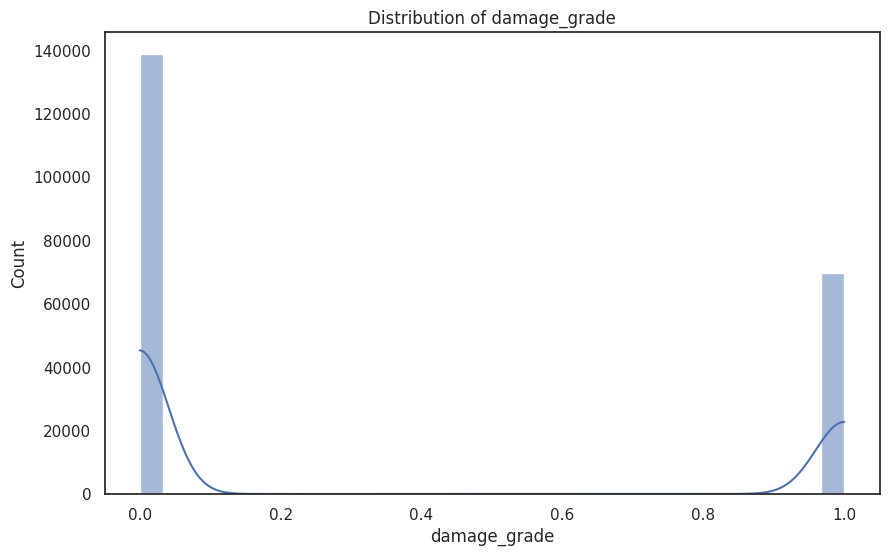

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Function to plot the distribution of damage levels
def plot_damage_distribution(train):
  damage_counts = train['damage_grade'].value_counts().reset_index()
  damage_counts.columns = ['Damage Grade','Count']

  ax = damage_counts.plot.bar(x='Damage Grade', y='Count', rot=0)
  plt.title('Distribution of Damage Levels')
  plt.xlabel('Damage Grade')
  plt.ylabel('Count')
  plt.show

#Function to plot a correlation heatmap
def plot_correlation_heatmap(train):
  plt.figure(figsize=(140,80))
  sns.set_theme(style="white")
  corr = train.corr()
  annot_kws = {"fontsize": 35, "fontweight": "bold"}
  heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g', annot_kws = annot_kws)
  plt.xticks(fontsize=35, fontweight="bold")
  plt.yticks(fontsize=35, fontweight="bold")
  plt.show

#Function to plot historgrams for numeric columns
def plot_numeric_histograms(train):
  numeric_columns = train

  for column in numeric_columns:
    plt.figure(figsize=(8,6))
    plt.hist(train[column], bins = 20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#Function to plot box plots for quantitative data
def plot_box_plots(train):
  quantitative_data = train[['count_floors_pre_eq',
                           'age',
                           'area_percentage',
                           'height_percentage',
                           'count_families']]
  for column in quantitative_data:
    plt.figure(figsize=(8,6))
    plt.boxplot(train[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

#Function to calculate and print correlations with damage_grade
def calculate_correlations(train):
  superstructure_columns = ['has_superstructure_adobe_mud',
                          'has_superstructure_mud_mortar_stone',
                          'has_superstructure_stone_flag',
                          'has_superstructure_cement_mortar_stone',
                          'has_superstructure_mud_mortar_brick',
                          'has_superstructure_cement_mortar_brick',
                          'has_superstructure_timber',
                          'has_superstructure_bamboo',
                          'has_superstructure_rc_non_engineered',
                          'has_superstructure_rc_engineered',
                          'has_superstructure_other']

  selected_columns = superstructure_columns + ['damage_grade']
  selected_data = train[selected_columns]
  correlation_matrix = selected_data.corr()
  correlation_with_damage_grade = correlation_matrix['damage_grade']
  print(correlation_with_damage_grade)

#Function to separate variables into categorical and quantitative
def separate_cateogircal_quantitative(train):
  categorical_vars = []
  quantitative_vars = []
  for column in train.columns:
    if train[column].dtype == 'object':
      categorical_vars.append(column)
    else:
      quantitative_vars.append(column)
  return categorical_vars, quantitative_vars

def eda_categorical(data, categorical_vars):
  for column in categorical_vars:
    print(f"Exploratory Data Analysis for '{column}':")
    print(f"Top 5 most common values: \n{data[column].value_counts().head(5)}")

    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()

categorical_vars = ['land_surface_condition',
  'foundation_type',
  'roof_type',
  'ground_floor_type',
  'other_floor_type',
  'position',
  'plan_configuration',
  'legal_ownership_status']

def eda_quantitative(data, quantitative_vars):
  for column in quantitative_vars:
    print(f"Exploratory Data Analysis for '{column}':")
    print(f"Summary Statistics:\n{data[column].describe()}")

    plt.figure(figsize=(10,6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

quantitative_vars = ['building_id',
  'geo_level_1_id',
  'geo_level_2_id',
  'geo_level_3_id',
  'count_floors_pre_eq',
  'age',
  'area_percentage',
  'height_percentage',
  'has_superstructure_adobe_mud',
  'has_superstructure_mud_mortar_stone',
  'has_superstructure_stone_flag',
  'has_superstructure_cement_mortar_stone',
  'has_superstructure_mud_mortar_brick',
  'has_superstructure_cement_mortar_brick',
  'has_superstructure_timber',
  'has_superstructure_bamboo',
  'has_superstructure_rc_non_engineered',
  'has_superstructure_rc_engineered',
  'has_superstructure_other',
  'count_families',
  'has_secondary_use',
  'has_secondary_use_agriculture',
  'has_secondary_use_hotel',
  'has_secondary_use_rental',
  'has_secondary_use_institution',
  'has_secondary_use_school',
  'has_secondary_use_industry',
  'has_secondary_use_health_post',
  'has_secondary_use_gov_office',
  'has_secondary_use_use_police',
  'has_secondary_use_other',
  'damage_grade']

train.describe()
train.info()
train.isnull().sum()
train[train.columns[1:]].corr()['damage_grade'][:].sort_values(ascending=False).to_frame()
plot_damage_distribution(train)
plot_correlation_heatmap(train)
plot_numeric_histograms(train)
plot_box_plots(train)
calculate_correlations(train)
separate_cateogircal_quantitative(train)
eda_categorical(train, categorical_vars)
eda_quantitative(train, quantitative_vars)

Mud mortar stone has moderate positive correlation, so it suggests that buildings with a superstruture made of mud mortar stone are more likely to experience higher damage

Cement mortar stone has a moderate negative correlation suggesting that buildings with superstructures made of cement mortar brick are less likely to experience higher damage.

**Identifying Null Values and Unique Values** To further understand the data, we assess the number of unique elements and the number of null values each variable has.

In [ ]:
train.nunique()
train.isnull().sum()

train[train.columns[1:]].corr()['damage_grade'][:].sort_values(ascending=False).to_frame()


<ipython-input-3-4053ec8a0021>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train[train.columns[1:]].corr()['damage_grade'][:].sort_values(ascending=False).to_frame()


damage_grade
damage_grade                                1.000000
has_superstructure_mud_mortar_stone         0.179120
count_floors_pre_eq                         0.077000
has_superstructure_stone_flag               0.055406
count_families                              0.040679
geo_level_2_id                              0.032497
height_percentage                           0.031245
has_superstructure_adobe_mud                0.023305
age                                         0.011666
geo_level_3_id                              0.011363
has_secondary_use_use_police               -0.001438
geo_level_1_id                             -0.006155
has_secondary_use_school                   -0.006464
has_secondary_use_health_post              -0.006553
has_secondary_use_gov_office               -0.007137
has_secondary_use_industry                 -0.007311
has_secondary_use_agriculture              -0.011425
has_superstructure_mud_mortar_brick        -0.016096
has_secondary_use_institution              -0.016563
has_secondary_use_other                    -0.018218
has_superstructure_other                   -0.022031
has_secondary_use_rental                   -0.046670
has_superstructure_cement_mortar_stone     -0.056283
has_superstructure_bamboo                  -0.060710
has_secondary_use_hotel                    -0.065132
has_secondary_use                          -0.066352
has_superstructure_timber                  -0.067068
area_percentage                            -0.081945
has_superstructure_rc_engineered           -0.084553
has_superstructure_rc_non_engineered       -0.093401
has_superstructure_cement_mortar_brick     -0.168319

### Feature Engineering

Next we conduct feature engineering, or the process of transforming data to increase the performance of predictive models.

---

**Importance**

1.   better predictive accuracy
2.   better interpretability of relationships in the data

---
####Aggregation
- We utilize aggregation, or the process of combining and summarizing multiple data values into a single value or set of values.





1. positive correlation features:
  *   'combined_mud_stone': We want to know if a building is made of either mud or stone materials because they can be more prone to damage in an earthquake (based on the coorelation matrix). So this feature checks if a building has either mud or stone (or both) in its construction. if it does, the feature gets a "yes", and if it doesn't it gets a "no"
  * 'family_size': We're trying to understand how many families live in a building compared to how many floors it has. If there are many families on just a few floors, it could mean the building is crowded, whcih mgiht be related to the portential amange.

2. negative correlation features:
  - 'area_to_rc_engineered': This looks at how much of the building's area is covered by a special type of construction material called "engineered reinforced concrete." If there's a lot of this material, it might make the buildign mroe resistant to damage.
  - 'area_to_rc_non_engineered': Similar to the previous one, but it checks a different type of construction material called "non-engineered reinforced concrete." We want to know how much of the building is made from this material.
  - 'area_to_cement_brick': This feature checks how much of the building's area is covered by "cement bricks," another type of construction material. It helps us see if this material makes the building more resistant to damage.

  https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
  https://datascience.stackexchange.com/questions/78166/can-features-negatively-correlated-with-the-target-be-used

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Positive correlation features
train['combined_mud_stone'] = train['has_superstructure_mud_mortar_stone'] + train['has_superstructure_stone_flag']
train['family_size'] = train ['count_families'] / train['count_floors_pre_eq']

#Negative correlation feautres
train['area_to_rc_engineered'] = train['area_percentage'] * train['has_superstructure_rc_engineered']
train['area_to_rc_non_engineered'] = train['area_percentage'] * train['has_superstructure_rc_non_engineered']
train['area_to_cement_brick'] = train['area_percentage'] * train['has_superstructure_cement_mortar_brick']

train = pd.get_dummies(train)

X = train.drop(['damage_grade'], axis = 'columns')
y = train['damage_grade']



### Model Building

We considered the following models:

1. Random Forest
2. Decision Tree

We ultimately decided on using the XGB and random forest since decision trees may overfit to the training set, leading to lower levels of accuracy when predicting the test set.

---
####Random Forest Regression
A random forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees into determining the final output rather than relying on individual decision trees.

[Reference](https://towardsdatascience.com/bagging-decision-trees-clearly-explained-57d4d19ed2d3)


## Gradient Boosting Classifier
We first tried using a Gradient Boosting Classifier

In [ ]:
# GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Positive correlation features
train['combined_mud_stone'] = train['has_superstructure_mud_mortar_stone'] + train['has_superstructure_stone_flag']
train['family_size'] = train ['count_families'] / train['count_floors_pre_eq']

#Negative correlation feautres
train['area_to_rc_engineered'] = train['area_percentage'] * train['has_superstructure_rc_engineered']
train['area_to_rc_non_engineered'] = train['area_percentage'] * train['has_superstructure_rc_non_engineered']
train['area_to_cement_brick'] = train['area_percentage'] * train['has_superstructure_cement_mortar_brick']

train = pd.get_dummies(train)


#TEST DATA
#Positive correlation features
testFeatures['combined_mud_stone'] = testFeatures['has_superstructure_mud_mortar_stone'] + testFeatures['has_superstructure_stone_flag']
testFeatures['family_size'] = testFeatures['count_families'] / testFeatures['count_floors_pre_eq']

#Negative correlation feautres
testFeatures['area_to_rc_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_engineered']
testFeatures['area_to_rc_non_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_non_engineered']
testFeatures['area_to_cement_brick'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_cement_mortar_brick']

testFeatures = pd.get_dummies(testFeatures)

X_train = train.drop(['damage_grade'], axis = 'columns')
y_train = train['damage_grade']
X_test = testFeatures

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict_proba(X_test)


submission = pd.DataFrame({'id' : testFeatures['building_id'], 'Predicted' : y_pred[:, 1]})
print(submission)


NameError: ignored

In [ ]:
# Code that builds our predictive models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier=RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

## Testing XGB Classifier Model with Feature Engineering
We added feature engineering methods (weighted top features) to try to improve predictive success.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Define a function for feature engineering
def perform_feature_engineering(data):
    # Positive correlation features
    data['combined_mud_stone'] = data['has_superstructure_mud_mortar_stone'] + data['has_superstructure_stone_flag']
    data['family_size'] = data['count_families'] / data['count_floors_pre_eq']

    # Negative correlation features
    data['area_to_rc_engineered'] = data['area_percentage'] * data['has_superstructure_rc_engineered']
    data['area_to_rc_non_engineered'] = data['area_percentage'] * data['has_superstructure_rc_non_engineered']
    data['area_to_cement_brick'] = data['area_percentage'] * data['has_superstructure_cement_mortar_brick']

    data = pd.get_dummies(data)
    return data

# Perform feature engineering on the training and test data
train = perform_feature_engineering(train)
testFeatures = perform_feature_engineering(testFeatures)

# Split the training data into X and y
X_train = train.drop(['damage_grade'], axis=1)
y_train = train['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=2000, learning_rate=0.1)
xgb_model.fit(X_train, y_train)


feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

n_top_features = 10  # Replace with the number of top features you want to keep
top_features = feature_importance_df.head(n_top_features)['Feature']

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

print(feature_importance_df)

# Make predictions on the test data
y_pred = xgb_model.predict_proba(testFeatures)
print(y_pred)


# Create the submission DataFrame
submission = pd.DataFrame({'id': testFeatures['building_id'], 'Predicted': y_pred[:, 1]})
print(submission)

                                   Feature  Importance
41                       foundation_type_r    0.170427
49                     ground_floor_type_v    0.143106
13  has_superstructure_cement_mortar_brick    0.088789
1                           geo_level_1_id    0.053373
46                             roof_type_x    0.043714
..                                     ...         ...
24           has_secondary_use_institution    0.001286
65                    plan_configuration_n    0.000920
63                    plan_configuration_f    0.000718
28            has_secondary_use_gov_office    0.000544
29            has_secondary_use_use_police    0.000397

[74 rows x 2 columns]
[[0.92039764 0.07960233]
 [0.9056946  0.09430538]
 [0.9158301  0.08416991]
 ...
 [0.78492916 0.21507086]
 [0.2441405  0.7558595 ]
 [0.89800316 0.10199685]]
           id  Predicted
0      114565   0.079602
1      132642   0.094305
2      333379   0.084170
3      137682   0.386092
4      246829   0.075362
...       .

## Logistic Regression Model
We next tried a logistic regression model. We found that the model had a relatively low accuracy compared to other models, so this was not used in our submissions.

Model Accuracy: 0.6634929009976976


Text(91.25, 0.5, 'Truth')

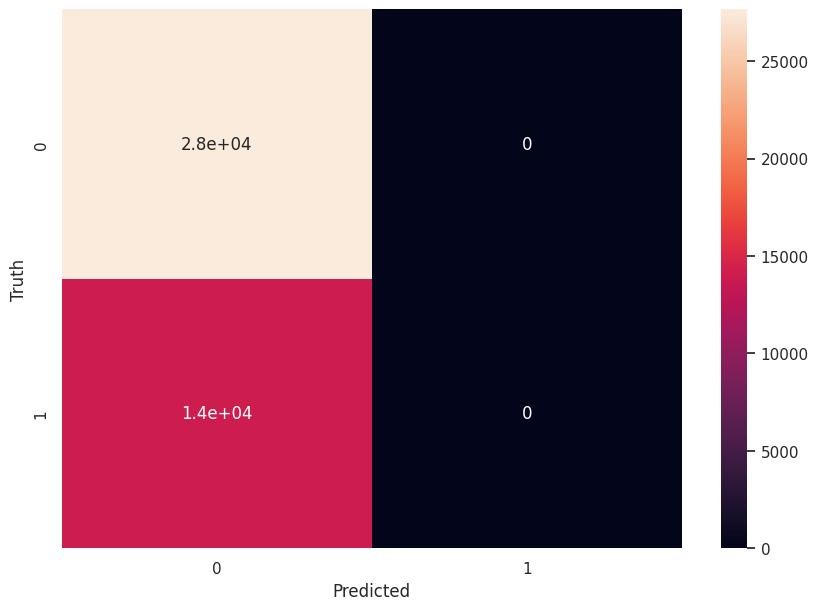

In [ ]:
# Code that builds our predictive models
from sklearn.linear_model  import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_log_reg = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f'Model Accuracy: {accuracy}')

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log_reg)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Model Evaluation

We conducted a confusion matrix for the Random Forest regressor.

Model Accuracy: 0.7850153491941673


Text(91.25, 0.5, 'Truth')

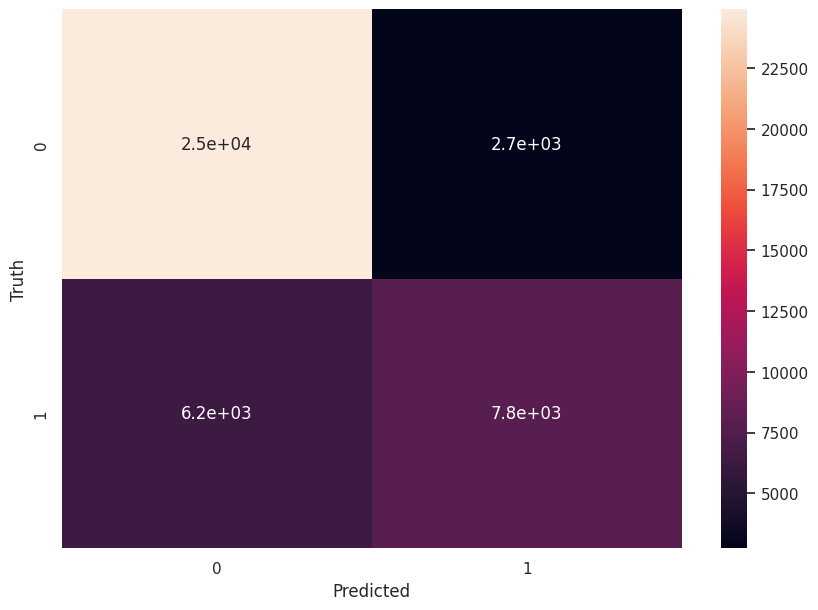

In [ ]:
# Add code here to evalute your models.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

rf_classifier=RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict_proba(X_test)

y_pred_for_confusion_matrix = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_for_confusion_matrix)
print(f'Model Accuracy: {accuracy}')


# Visualization

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_for_confusion_matrix)
cm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **Submit to Competition**

Run the cell below to read in the test set features.

Then, you can use your model to generate predictions on this data, then create a dataframe with the following format / variables:
+ `id` - the unique ID for each observation.
+ `predicted` - your model's predicted probability that a building has moderate/high damage.

The data frame should look like the following:

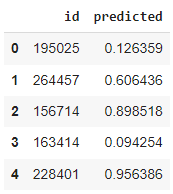

&#9940; Make sure the `predicted` column contains the *probability* prediction from your model and not a binary (0/1) prediction. Additionally, be aware that you are limited to 100 Kaggle submissions per day.

Write this data frame to a csv file called `"submission.csv"`. Then download this file by opening the files pane within Colab (look for the &#128193; symbol on the left of the screen). This is shown in the gif below.

After downloading the file, make a submission to our [Kaggle competition](https://www.kaggle.com/t/1343c820124247e0afa3d2bbe28f7514). If you haven't already, you'll need to first sign in on Kaggle and hit "**Join the Competition**" in order to submit.

In [ ]:
# Download file with features in the test set
testFeaturesURL = "https://drive.google.com/uc?id=1m_VzX9dMs18w_Fiwk4Iy30T3724S8Wcg"
gdown.download(testFeaturesURL, "test.csv", quiet=True)

# Read test set features into a pandas data frame
testFeatures = pd.read_csv("test.csv")
testFeatures.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       114565               4             529            4583   
1       132642              22             170             286   
2       333379              20            1402            3794   
3       137682               8             396            4772   
4       246829              20             190            3473   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   40                7                  5   
1                    2   30                5                  5   
2                    2   40                9                  5   
3                    3   20                5                  7   
4                    2    5                7                  6   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               u  ...                             0   
1                      t               r  ...                             0   
2                      t               r  ...                             0   
3                      o               r  ...                             0   
4                      t               w  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [ ]:
#Add code to generate your predictions for the test set here.


## CODE FOR RANDOM FOREST -- We decided to use XGB instead
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# #Positive correlation features
# testFeatures['combined_mud_stone'] = testFeatures['has_superstructure_mud_mortar_stone'] + testFeatures['has_superstructure_stone_flag']
# testFeatures['family_size'] = testFeatures['count_families'] / testFeatures['count_floors_pre_eq']

# #Negative correlation feautres
# testFeatures['area_to_rc_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_engineered']
# testFeatures['area_to_rc_non_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_non_engineered']
# testFeatures['area_to_cement_brick'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_cement_mortar_brick']


# y_train = train['damage_grade']
# x_train = train.drop(['land_surface_condition',
#   'foundation_type',
#   'roof_type',
#   'ground_floor_type',
#   'other_floor_type',
#   'position',
#   'plan_configuration',
#   'legal_ownership_status'], axis = 'columns')
# x_test = testFeatures.drop(['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'], axis = 'columns')

# rf_classifier=RandomForestClassifier(n_estimators=100)
# rf_classifier.fit(x_train, y_train)

# y_pred = rf_classifier.predict(x_test)

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Positive correlation features
train['combined_mud_stone'] = train['has_superstructure_mud_mortar_stone'] + train['has_superstructure_stone_flag']
train['family_size'] = train ['count_families'] / train['count_floors_pre_eq']

#Negative correlation feautres
train['area_to_rc_engineered'] = train['area_percentage'] * train['has_superstructure_rc_engineered']
train['area_to_rc_non_engineered'] = train['area_percentage'] * train['has_superstructure_rc_non_engineered']
train['area_to_cement_brick'] = train['area_percentage'] * train['has_superstructure_cement_mortar_brick']

train = pd.get_dummies(train)


#TEST DATA
#Positive correlation features
testFeatures['combined_mud_stone'] = testFeatures['has_superstructure_mud_mortar_stone'] + testFeatures['has_superstructure_stone_flag']
testFeatures['family_size'] = testFeatures['count_families'] / testFeatures['count_floors_pre_eq']

#Negative correlation feautres
testFeatures['area_to_rc_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_engineered']
testFeatures['area_to_rc_non_engineered'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_rc_non_engineered']
testFeatures['area_to_cement_brick'] = testFeatures['area_percentage'] * testFeatures['has_superstructure_cement_mortar_brick']


testFeatures = pd.get_dummies(testFeatures)

X_train = train.drop('damage_grade', axis = 1)
y_train = train['damage_grade']


print(X_test.columns)
X_test = testFeatures
print(X_test.columns)


xgb_model = xgb.XGBRegressor(objective="binary:logistic", random_state=42, n_estimators = 2000, eta=0.1, colsample_bytree=0.5)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

submission = pd.DataFrame({'id' : testFeatures['building_id'], 'Predicted' : y_pred})
print(submission)



Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other', 'combined_mud_stone', 'fa

In [ ]:
submission.to_csv("submission.csv", index = False)

#Conclusion

We utilized the XGB regressor as our final model due to its accuracy. We used a high amount of estimators, a learning level (eta) of 0.1, and modified the colsample_bytree to 0.5 (which is "the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.")

For more information on our final model, see the documentation for XGBoost Parameters

[https://xgboost.readthedocs.io/en/stable/parameter.html](https://xgboost.readthedocs.io/en/stable/parameter.html)